<a href="https://colab.research.google.com/github/Neurocoders/AttentionProject/blob/branch1/Copy_of_load_steinmetz_data_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading of Steinmetz data

includes some visualizations

In [1]:
#@title Data retrieval
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

fname.append('steinmetz_st.npz')
fname.append('steinmetz_wav.npz')
fname.append('steinmetz_lfp.npz')


url.append("https://osf.io/4bjns/download")
url.append("https://osf.io/ugm9v/download")
url.append("https://osf.io/kx3v9/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)


In [2]:
import numpy as np

alldat = np.array([])
for j in range(3):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

dat_LFP_all = np.load('steinmetz_lfp.npz', allow_pickle=True)['dat']

# dat_WAV = np.load('steinmetz_wav.npz', allow_pickle=True)['dat']
# dat_WAV = dat_WAV[11]
# print(dat_WAV.keys())
# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 


In [3]:
n_mice = len(alldat)
for i in range(n_mice):
    del alldat[i]['lfp']
    del alldat[i]['spks']
    del alldat[i]['wheel']
    del alldat[i]['pupil']
    del alldat[i]['brain_area']
    del alldat[i]['brain_area_lfp']
    del alldat[i]['trough_to_peak']
    del alldat[i]['waveform_w']
    del alldat[i]['waveform_u']
    del alldat[i]['spks_passive']
    del alldat[i]['pupil_passive']
    del alldat[i]['wheel_passive']
    del alldat[i]['lfp_passive']


# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = alldat[11]
dat_LFP = dat_LFP_all[11] #beware of lfp vs LFP here
print(dat_LFP.keys())
print(dat.keys())

dict_keys(['lfp', 'lfp_passive', 'brain_area_lfp'])
dict_keys(['response', 'response_time', 'bin_size', 'stim_onset', 'contrast_right', 'contrast_left', 'feedback_time', 'feedback_type', 'gocue', 'mouse_name', 'date_exp', 'active_trials', 'contrast_left_passive', 'contrast_right_passive'])


`alldat` contains 39 sessions from 10 mice, data from Steinmetz et al, 2019. Time bins for all measurements are 10ms, starting 500ms before stimulus onset. The mouse had to determine which side has the highest contrast. For each `dat = alldat[k]`, you have the following fields:

* `dat['mouse_name']`: mouse name
* `dat['date_exp']`: when a session was performed
* `dat['spks']`: neurons by trials by time bins.    
* `dat['brain_area']`: brain area for each neuron recorded. 
* `dat['contrast_right']`: contrast level for the right stimulus, which is always contralateral to the recorded brain areas.
* `dat['contrast_left']`: contrast level for left stimulus. 
* `dat['gocue']`: when the go cue sound was played. 
* `dat['response_times']`: when the response was registered, which has to be after the go cue. The mouse can turn the wheel before the go cue (and nearly always does!), but the stimulus on the screen won't move before the go cue.  
* `dat['response']`: which side the response was (`-1`, `0`, `1`). When the right-side stimulus had higher contrast, the correct choice was `-1`. `0` is a no go response. 
* `dat['feedback_time']`: when feedback was provided. 
* `dat['feedback_type']`: if the feedback was positive (`+1`, reward) or negative (`-1`, white noise burst).  
* `dat['wheel']`: exact position of the wheel that the mice uses to make a response, binned at `10ms`. 
* `dat['pupil']`: pupil area  (noisy, because pupil is very small) + pupil horizontal and vertical position. 
* `dat['lfp']`: recording of the local field potential in each brain area from this experiment, binned at `10ms`.
* `dat['brain_area_lfp']`: brain area names for the LFP channels. 
* `dat['trough_to_peak']`: measures the width of the action potential waveform for each neuron. Widths `<=10` samples are "putative fast spiking neurons". 
* `dat['waveform_w']`: temporal components of spike waveforms. `w@u` reconstructs the time by channels action potential shape. 
* `dat['waveform_u]`: spatial components of spike waveforms.
* `dat['%X%_passive']`: same as above for `X` = {`spks`, `lfp`, `pupil`, `wheel`, `contrast_left`, `contrast_right`} but for  passive trials at the end of the recording when the mouse was no longer engaged and stopped making responses. 




In [4]:
#@title Import matplotlib and set defaults
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [20, 4]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [5]:
#@title Run this cell if you want to see the shape of different data dictionary fields

for keys in dat_LFP:
    try:
        print(f"the shape of {keys} is:", dat_LFP[keys].shape)
    except:
        print(f"{keys}:", dat_LFP[keys])
        
for keys in dat: # see the shape of contents of "dat" variable
    try:
        print(f"the shape of {keys} is:", dat[keys].shape)
    except:
        print(f"{keys}:", dat[keys])
        

the shape of lfp is: (12, 340, 250)
the shape of lfp_passive is: (12, 110, 250)
brain_area_lfp: ['DG', 'LGd', 'SUB', 'VISp', 'ACA', 'MOs', 'PL', 'CA1', 'DG', 'LH', 'MD', 'VISam']
the shape of response is: (340,)
the shape of response_time is: (340, 1)
bin_size: 0.01
stim_onset: 0.5
the shape of contrast_right is: (340,)
the shape of contrast_left is: (340,)
the shape of feedback_time is: (340, 1)
the shape of feedback_type is: (340,)
the shape of gocue is: (340, 1)
mouse_name: Lederberg
date_exp: 2017-12-05
the shape of active_trials is: (450,)
the shape of contrast_left_passive is: (110,)
the shape of contrast_right_passive is: (110,)


In [6]:
#@title Import required libraries
# please use the same conventions across the document
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import scipy.signal as signal
import scipy.fftpack as fftpack  
import timeit
from scipy.signal import butter, lfilter
# from statsmodels.nonparametric.smoothers_lowess import lowess

In [7]:
#@title Data splitting
def split_stim_indices(dat):
  n_trials = len(dat['response'])
  no_stim = np.logical_and(dat['contrast_left'] == 0, dat['contrast_right'] == 0)
  one_side_stim = np.logical_xor(dat['contrast_left'] == 0, dat['contrast_right'] == 0)
  two_side_stim = np.logical_and(dat['contrast_left'] > 0, dat['contrast_right'] > 0)
  return (no_stim, one_side_stim, two_side_stim)

def split_accuracy_indices(dat):
  n_trials = len(dat['response'])
  correct = []
  incorrect = []
  for i in range(n_trials):
    if (dat['contrast_left'][i] > dat['contrast_right'][i] and dat['response'][i] == 1 ):
      correct.append( True )
      incorrect.append(False)
    elif (dat['contrast_left'][i] < dat['contrast_right'][i] and dat['response'][i] == -1 ):
      correct.append( True )
      incorrect.append(False)
    elif (dat['contrast_left'][i] == 0 and dat['contrast_right'][i] == 0 and dat['response'][i] == 0 ):
      correct.append( True )
      incorrect.append(False)
    else:
      incorrect.append( True )
      correct.append(False)
  return (correct, incorrect)

no_stim, one_side_stim, two_side_stim = split_stim_indices(dat)
correct, incorrect = split_accuracy_indices(dat)
#to get only one_side trials which are correct use np.logical_and(one_side_stim, correct)
correct_one_side = np.logical_and(one_side_stim, correct)

correct_two_side = np.logical_and(two_side_stim, correct)
incorrect_two_side = np.logical_and(two_side_stim, incorrect)
correct_no_stim = np.logical_and(no_stim, correct)
incorrect_no_stim = np.logical_and(no_stim, incorrect)

incorrect_one_side = np.logical_and(one_side_stim, incorrect)

/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
 

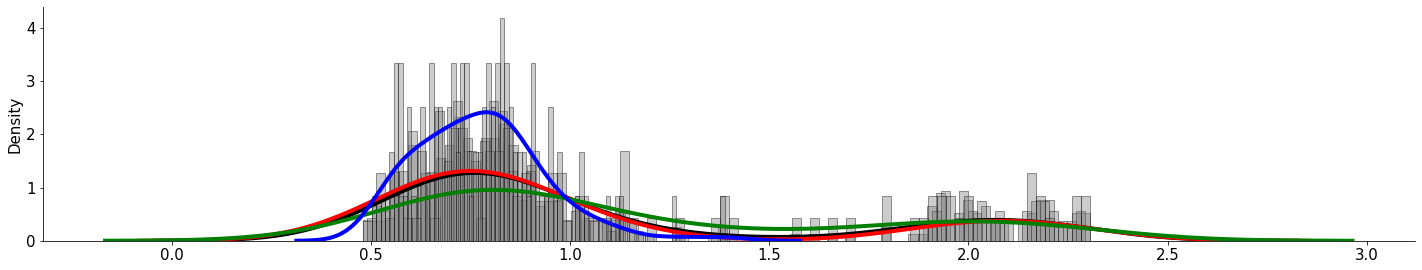

In [8]:
eff_response = dat["response_time"]-dat["gocue"]
plotter = dat["response_time"]
sns.distplot(plotter, hist=True, kde=True,  # plot histogram with kernel density
             bins=80, color = 'gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'k'});
sns.distplot(plotter[correct], hist=True, kde=True,  # plot histogram with kernel density
             bins=80, color = 'gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'r'});
sns.distplot(plotter[incorrect], hist=True, kde=True,  # plot histogram with kernel density
             bins=80, color = 'gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'g'});
sns.distplot(plotter[two_side_stim], hist=True, kde=True,  # plot histogram with kernel density
             bins=80, color = 'gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'b'});

**Considerations:**

1- go cue time, response time and feedback time are measured with respect to the same time reference point (have the same 0 time)

2- cannot understand the "reaction time" variable

3- have some infinity values in the reaction time! (confirm this?)

In [9]:
#------------ Initial required variables, gather them in here if possible--------------

dt = 10 # binning at 10 ms
fs = 1/(dt/1000) # Sampling frequency
NT = dat_LFP['lfp'].shape[-1] # number of time bins
time_vec = dt * np.arange(NT)
total_trial = dat_LFP['lfp'].shape[1] # number of trials

# lfp has form brain area* trial * time

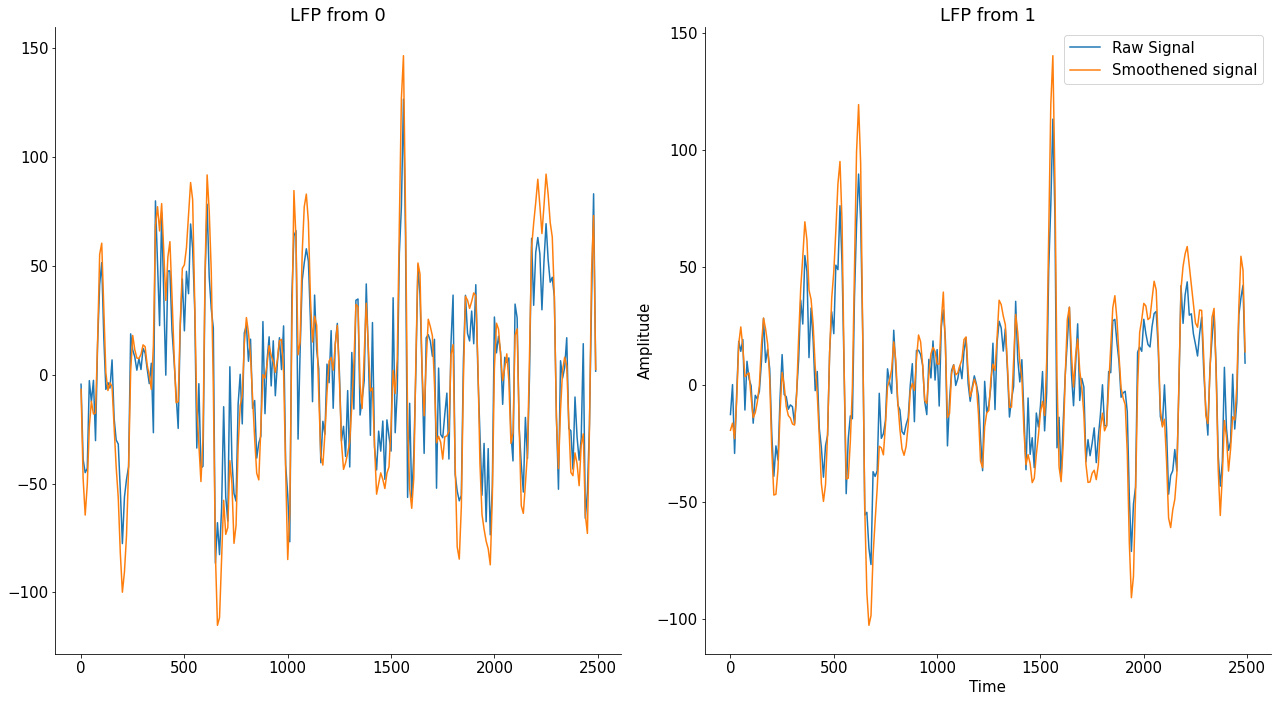

In [10]:
def visualize_areas(data_LFP_all = dat_LFP_all, i_mouse = 11,
                    trial_num = 1,typ = "hamming", win_len = 4, 
                 data_all = dat, fig_size = (18,10), st = 0.5, plot_raw = False,
                  plot_smoth = False, area1 = 0, area2 = 1, passive = False):
    """
    Returns two indices corresponding to the user defined brain regions to study LFP
  
    Args:
    data_LFP: dictionary of LFPs
    trial_num : Trial number to visualize
    typ:  type of filter window, choose from gaussian, hamming, and hann
    win_len: length of the filter window
    data_all: Contains the reaction times, go cue and other trail information 
    st: standard deviation of gaussian filter
    plot_raw: boolean, if you want to visualize the raw LFP
    plot_smoth: boolean, if you want to visualize the smoothed results

    output:
    ind1: index of the first brain region that we want to study
    ind2: index of the second brain region that we want to study
    area1: name of the first brain region that we want to study
    area2: name of the second brain region that we want to study

    """
    # print(data_LFP["brain_area_lfp"])
    # area1 = input("please insert the first lfp region to plot:")
    # area2 = input("please insert the second lfp region to plot:")
    data_LFP = dat_LFP_all[i_mouse]
    ind1 = area1
    ind2 = area2
    regions = np.array(data_LFP["brain_area_lfp"]) # this is for multiple occurences of one region
    if passive:
      data = data_LFP["lfp_passive"]
    else:
      data = data_LFP["lfp"]
 
    # visualization of raw LFPs before filtering
    # temp_inp = input("do you wish to visualize the 2 LFPs that you want to analyse? y/n")
    if plot_raw:
        plt.figure(figsize = (10,7))
        plt.plot(time_vec, data[ind1, trial_num,:], label = area1 );
        plt.plot(time_vec, data[ind2, trial_num, :], label = area2)

        plt.axvline(x = (data_all["gocue"])[trial_num] * 1000, color = 'black', label = "go cue") # need the go cue and response/reaction time 
        plt.axvline(x = (data_all["response_time"])[trial_num] * 1000,             # from the main data
                ls = '--', color = 'black', label = "response time")

        plt.xlabel("time(ms)", fontsize = 12)
        plt.ylabel("voltage", fontsize = 12)
        plt.title("plot of two unfiltered LFPs", fontsize = 13)
        plt.legend()
        plt.show()

        # smoothing filtering
        # choosing the window type
    if typ == "hann":
        win = signal.windows.hann(win_len, sym=True)
    elif typ == "gaussian":
        # st = float(input("you have chosen gaussian, please specify a number for gaussian filter's standard deviation"))
        win = signal.windows.gaussian(win_len, st, sym=True)
    
    elif typ == "hamming":
        win = signal.windows.hamming(win_len, sym=True)

    else:
        raise ValueError("type is not  hann, hamming, gaussian")

     # applying the filter using filtfilt    
    smooth_sign1 = signal.filtfilt(b = win, a = 1, x = data[ind1, trial_num, :], axis=- 1, padtype='odd', padlen=None, method='pad', irlen=None)
    smooth_sign2 = signal.filtfilt(b = win, a = 1, x = data[ind2, trial_num, :], axis=- 1, padtype='odd', padlen=None, method='pad', irlen=None)

    # plotting filter results
    # temp_inp2 = input("do you wish to visualize the results of your smoothing? y/n")
    if plot_smoth:
        fig, axs = plt.subplots(1,2,figsize = fig_size)
        
        axs[0].plot(time_vec, data[ind1, trial_num, :],label = 'Raw Signal')
        axs[0].plot(time_vec, smooth_sign1,label = 'Smoothened signal')
        axs[0].set(title = f"LFP from {area1}")
        
        #plt.figure(figsize = (10,7))
        axs[1].plot(time_vec,data_LFP["lfp"][ind2, trial_num, :],label = 'Raw Signal')
        axs[1].plot(time_vec,smooth_sign2,label = 'Smoothened signal')
        axs[1].set(title = f"LFP from {area2}")
        plt.xlabel('Time'); plt.ylabel('Amplitude')
        plt.legend(); plt.show()

    return smooth_sign1, smooth_sign2

    
#@title Get Filtered LFP data for the interested brain areas
smooth_sig1, smooth_sig2 = visualize_areas(trial_num = 1,typ = "gaussian", win_len = 4, 
                 data_all = dat, fig_size = (18,10), area1 = 0, area2 = 1, plot_smoth=True) #gaussian is good


In [11]:
# filtered = lowess(measurements, input_range, frac=0.05)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='bandpass')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5, axis=-1):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data, axis=axis)
    return y

def smoothen(sig, typ = "gaussian", win_len = 4, 
                 fig_size = (18,10), st = 0.5, axis = -1):
    
    # smoothing filtering
    # choosing the window type
    if typ == "hann":
        win = signal.windows.hann(win_len, sym=True)
    elif typ == "gaussian":
        # st = float(input("you have chosen gaussian, please specify a number for gaussian filter's standard deviation"))
        win = signal.windows.gaussian(win_len, st, sym=True)
    elif typ == "hamming":
        win = signal.windows.hamming(win_len, sym=True)
    else:
        raise ValueError("type is not  hann, hamming, gaussian")

     # applying the filter using filtfilt    
    smooth_sign = signal.filtfilt(b = win, a = 1, x = sig, axis= axis, padtype='odd', padlen=None, method='pad', irlen=None)

    return smooth_sign

In [12]:
#smoothening and normalizing each trial
for i in range(n_mice):
#     dat_LFP_all[i]['smooth_lfp'] = smoothen(dat_LFP_all[i]['lfp'], axis = 2)
    dat_LFP_all[i]['smooth_lfp'] = butter_bandpass_filter(dat_LFP_all[i]['lfp'], 4, 12, fs, axis = 2)
    dat_LFP_all[i]['smooth_lfp'] /= np.linalg.norm(dat_LFP_all[i]['smooth_lfp'], axis = 2, keepdims=True)
    dat_LFP_all[i]['alpha_lfp'] = butter_bandpass_filter(dat_LFP_all[i]['lfp'], 8, 12, fs, axis = 2)
    dat_LFP_all[i]['alpha_lfp'] /= np.linalg.norm(dat_LFP_all[i]['alpha_lfp'], axis = 2, keepdims=True)
    dat_LFP_all[i]['theta_lfp'] = butter_bandpass_filter(dat_LFP_all[i]['lfp'], 4, 7, fs, axis = 2)
    dat_LFP_all[i]['theta_lfp'] /= np.linalg.norm(dat_LFP_all[i]['theta_lfp'], axis = 2, keepdims=True)

In [13]:
#@ ---------------Fourier Transform--------------------
# NT => number of time points, NT/2 would be the nyquest 
# dt => time bin size
dt = 10
# time_vec => time vector in ms
NT = dat_LFP['lfp'].shape[-1] # number of time bins
time_vec = dt * np.arange(NT)
area1 = 1
area2 = 11
def fourier(NT = NT, dt = dt, signal1 = smooth_sig1, signal2 =  smooth_sig2,
            dat = dat_LFP,trial_num = 1, area1 = area1,
                area2 = area2, fig_size = (18,10), plot_f= False):
    """
   

    This function performs fourier transformation using FFT on the lfp signal and also
    plots the time series and frequency result of fourier. dat[region, trial_num, :]
    
    Inputs:
    NT: number of total time points
    dt: size of time bin
    signal1: first time seri to decompose, set to the first output of the smoothing by default
    signal2: second time seri to decompose, set to the second output of the smoothing by default
    dat: dictionary containing the lfp data
    trial_num: number of trial to plut, 
    plot_f: boolean, if you want to plot the fourier results

    Returns:
    hz, amp1, amp2
    hz: frequency vector (hz = np.linspace(0,sampl_rate, NT) )
    amp1: amplitude result of fourier transform of area 1 LFP
    amp2: amplitude result of fourier transform of area 1 LFP
    * both only contain elements up to the nyquist frequency 
    """

    sampl_rate = 1/(dt/1000) # sampling rate
    nyquist = sampl_rate/2


    freq_seri1 = fftpack.fft(signal1) #compute freq seri
    freq_seri2 = fftpack.fft(signal2)

    hz = np.linspace(0,sampl_rate, NT) # frequency vector same for all
   
    amp1 = 2.0/NT * np.abs(freq_seri1)  # amplitude vector,
    # 2 * is to add the amplitude from  negative frequencies to positive ones
    # divide by number of time points for normalization
    amp2 = 2.0/NT * np.abs(freq_seri2)
    
    
    # plot timeseries
    # temp_inp = input("do you want to visualize the results of your decomposition? y/n")

    if plot_f:
        fig, axs = plt.subplots(1,2, figsize = fig_size)

        axs[0].plot(hz, amp1) # this will have both neg and pos freqs so we have to limit it to nyquist
        axs[0].set(ylabel='Amplitude',xlabel='Frequency (Hz)',title= f'FFT result from {area1}', xlim = [0, nyquist])  
        axs[1].plot(hz, amp2) # this will have both neg and pos freqs so we have to limit it to nyquist
        axs[1].set(ylabel='Amplitude',xlabel='Frequency (Hz)',title= f'FFT result from {area2}', xlim = [0, nyquist])
        
        plt.show()

    # now we want to only return the elements of hz and amp that 
    # up to the nyquist: this is to find the index of nearest element of hz to nyquist   
    return_ind = int(np.where(abs(hz-nyquist) == np.min(abs(hz - nyquist)))[0][0])+1
    # pdb.set_trace()

    return hz[:return_ind], amp1[:return_ind], amp2[:return_ind]

freq_vals,fft_signal1,fft_signal2 = fourier()

In [14]:
def calc_correlation(signal1 = smooth_sig1, signal2 =  smooth_sig2):
  """
   

    This function uses scipy libraries to calculate different correlation
    coefficients and returns them
    
    Inputs:
    
    signal1: first time series to decompose, set to the first output of the smoothing by default
    signal2: second time series to decompose, set to the second output of the smoothing by default
       

    Returns:
    pearsonr co-relation coefficient
    spearmanr co-relation coefficient
    """

  pearsonr = stats.pearsonr(smooth_sig1,smooth_sig2)

  spearmanr = stats.spearmanr(smooth_sig1, smooth_sig2)

  return pearsonr, spearmanr

In [15]:
def freq_correlation(NT = NT, dt = dt, smooth_sig1 = smooth_sig1, smooth_sig2 =  smooth_sig2,
            dat_LFP = dat_LFP,trial_num = 1, area1 = area1,
                area2 = area2, fig_size = (18,10)):
  freq_vals,fft_signal1,fft_signal2 = fourier()
  pearsonr, spearmanr = calc_correlation(signal1 = smooth_sig1, signal2 =  smooth_sig2)
  return pearsonr, spearmanr
print(freq_correlation())

((0.7092320409449433, 1.580837721034471e-39), SpearmanrResult(correlation=0.6446783468535496, pvalue=9.197128689138895e-31))


In [16]:
no_stim, one_side_stim, two_side_stim = split_stim_indices(dat)
correct, incorrect = split_accuracy_indices(dat)

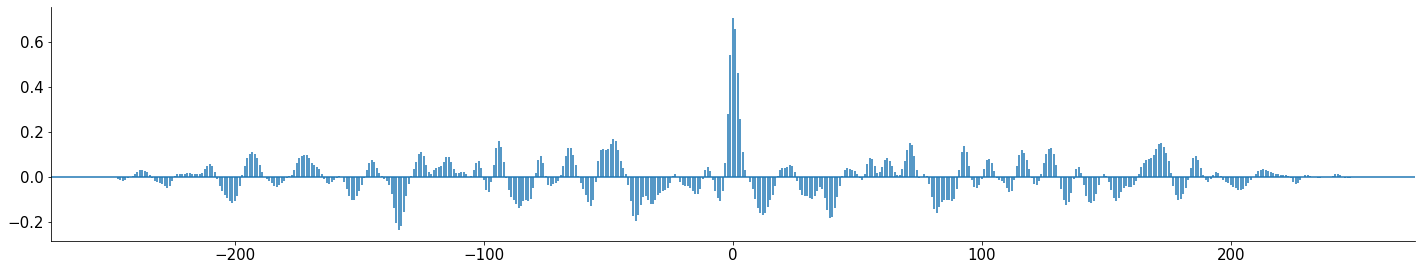

<Figure size 1440x288 with 0 Axes>

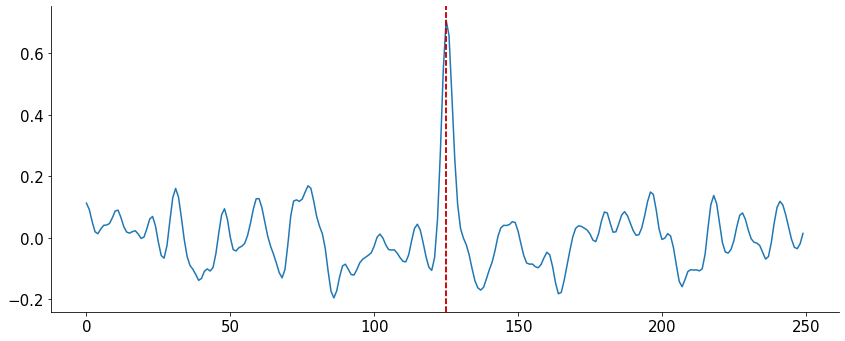

In [17]:
#------------------Cross correlation extraction and visualization----------------------
def cross_corr (sig1 = smooth_sig1, sig2 = smooth_sig2, maxlag = 249, fig_size = (12,7), 
                area1 = area1, area2 = area2, plot_cor = False):
    """
    this function visualizes and extracts the correlation data using matplotlib

    Args:
    sig1: first input signal, by default is smooth_sig1
    sig2: second input signal, by default is smooth_sig2
    maxlag: maximum number of lag steps that we want to inspect. from -maxlag to +maxlag
    fig_size: fig size
    area1: area of sig1
    area2; area of sig 2

    outputs:
    lag_vec, corr_vec, offset
    lag_vec: vector of lag steps
    corr_vec: vector of correlations computed at each lag step
    offset: number of steps that corresponds to the maximum correlation

    """
    
#     fig, axs = plt.subplots(1, 1, figsize = fig_size) # initialize figure

    # use matplot to get data and visualize
    lags = plt.xcorr(sig1, sig2, maxlags = maxlag, normed = True);
    lags = np.array(lags, dtype=object) # convert to array
    lag_vec = lags[0] #lag vector from matplot containing lag time points( note that we are using frames here not time in seconds)
    corr_vec = lags[1]  # correlation vector

#     axs.axvline(np.ceil(len(corr_vec)/2)-maxlag,color='k',linestyle='--',label='Center') # see where the lag 0 is
#     axs.axvline(np.argmax(corr_vec)-maxlag,color='r',linestyle='--',label='Peak synchrony') # find the lag of maximum correlation

    offset = np.ceil(len(corr_vec)/2) - np.argmax(corr_vec)
    max_cor = np.max(corr_vec)
#     axs.set(title = f"cross correlation betwee LFP of {area1} and {area2}\noffset = {offset} time points, each time point is {dt} ms\nS1 leads <> S2 leads" )
#     if plot_cor:
#         plt.show()
#     else:
#         plt.close()

    return lag_vec, corr_vec, offset, max_cor

cross_corr()

# ---------the lower part is for sanity checking the results of matplot with scipy. uncomment if you want to check---------
corr_fft = signal.correlate(smooth_sig1, smooth_sig2, mode='same', method = "fft") 
corr_fft/= (smooth_sig1.std() * smooth_sig2.std() * len(smooth_sig1))
plt.figure()
fig, ax = plt.subplots(1,1 , figsize = (12, 5))
ax.plot(corr_fft)
ax.axvline(np.ceil(len(corr_fft)/2),color='k',linestyle='--',label='Center') # see where the lag 0 is
ax.axvline(np.argmax(corr_fft),color='r',linestyle='--',label='Peak synchrony')

In [18]:
def cross_corr2(sig1, sig2):
    corr = np.correlate(sig1, sig2 , "full" )
    offset = np.ceil(len(corr)/2) - np.argmax(corr)
    maxcorr = np.max(corr)
    return corr, offset, maxcorr

cross_corr:  0.020963882999922134
correlate:  0.00024549199997636606
-119.0 -119.0
0.3718209762822882 0.3718209762822883
5.551115123125783e-17


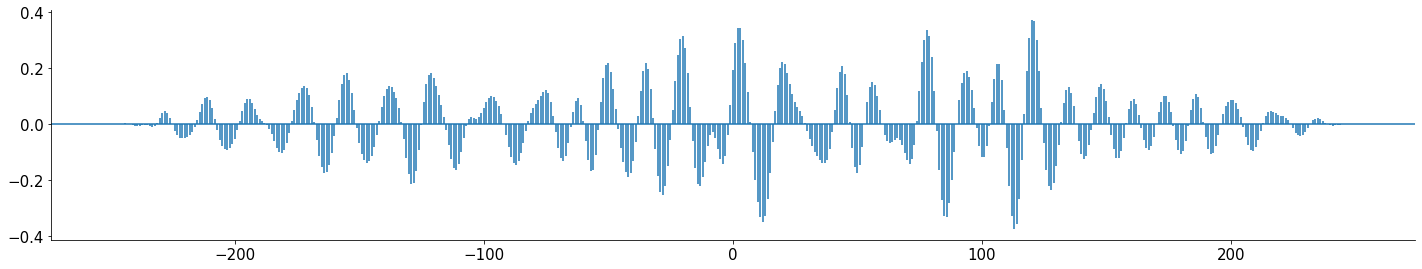

In [19]:
# Comparing pyplot cross_corr to cross_corr2(np.correlate)

start_time = timeit.default_timer()
smooth_sig1 = dat_LFP_all[11]['smooth_lfp'][0, 0]
smooth_sig2 = dat_LFP_all[11]['smooth_lfp'][1, 0]
lag_vec, corr_vec, offset, maxcor = cross_corr (sig1 = smooth_sig1, sig2 = smooth_sig2,maxlag = 249)
print("cross_corr: ", timeit.default_timer() - start_time)
start_time = timeit.default_timer()
corr, offset2, max_cor = cross_corr2(smooth_sig1 , smooth_sig2)
print("correlate: ", timeit.default_timer() - start_time)

# print(corr_vec)
# print(a)
print(offset, offset2)
print(maxcor, max_cor)
print(max(corr-corr_vec))

In [20]:
print(n_mice)

39


In [21]:
no_stim = []
one_side_stim = []
two_side_stim = []
correct = []
incorrect = []
correct_zero_trials = []
incorrect_zero_trials = []
correct_one_trials = []
incorrect_one_trials = []
correct_two_trials = []
incorrect_two_trials = []
for i in range(n_mice):
    no, one, two = split_stim_indices(alldat[i])
    cor, incor = split_accuracy_indices(alldat[i])
    no_stim.append(no)
    one_side_stim.append(one)
    two_side_stim.append(two)
    correct.append(cor)
    incorrect.append(incor)
    
    correct_zero_trials.append( np.logical_and(no, cor) )
    incorrect_zero_trials.append( np.logical_and(no, incor) )
    correct_one_trials.append( np.logical_and(one, cor) )
    incorrect_one_trials.append( np.logical_and(one, incor) )
    correct_two_trials.append( np.logical_and(two, cor) )
    incorrect_two_trials.append( np.logical_and(two, incor) )
            
    

In [22]:
correct_trials = correct_one_trials[i]
incorrect_trials = incorrect_one_trials[i]
correct_len = np.sum(correct_trials) # total number of correct trials
incorrect_len = np.sum(incorrect_trials) #total number of incorrect trials
total_trial = len(alldat[i]['response'])
correct_trials_ind = np.arange(0, total_trial)[correct_trials]  # get the indexes for correct trials
incorrect_trials_ind = np.arange(0, total_trial)[incorrect_trials] # get the indexes for incorrect trials
# ind1 = dat_LFP_all[i]['brain_area_lfp'].index(area1)
# ind2 = dat_LFP_all[i]['brain_area_lfp'].index(area2)
# for ind, trial in enumerate(correct_trials_ind):
#     print(ind, trial)
print(dat_LFP_all[i]['lfp'][0,2].shape)

(250,)


In [37]:
# Doing TLCC across all sessions
# groupings of brain regions
sectors = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                ]
regions = brain_groups[0] + brain_groups[1] + brain_groups[2] + brain_groups[3] + brain_groups[4] + brain_groups[5] + brain_groups[6]
regions_color = []
n_regions = len(regions)
n_groups = len(brain_groups)
for i in range(n_groups):
    regions_color += [i]*len(brain_groups[i])


In [24]:
def median(a):
    # Takes input array a and returns 
    # output b which is the median, which always exists in the array
    a.sort()
    if(len(a)):
        return a[int(len(a)/2)]
    else:
        return float('nan')

In [25]:
def max_synch_lag_distrib (i_mouse = [11], sides = 1, dist_plot = False,
                           fig_size = (18,5), area1 = "VISam", area2 = "LGd",
                           values = "correct"):
    
    """ 
    This function plots the distribution of lag frames corresponding to maximum correlation across different trials

    Args:
    i_mouse: array of mice to consider
    sides: enum(0,1,2) - to pick how many sided stimuli to consider
    dist_plot: boolean, whether to plot or not
    fig_size: figure size of each plot
    area1: Name of first area to correlate
    area2: Name of second area to correlate
    values: whether to return values for "correct" or "incorrect" trials
    
    Output:
    md_cor_lag: median lag across correct trials
    md_incor_lag: median lag across incorrect trials
    width_of_lags: width_of_lags
    """
    # initialize correlation and lag matrices for trials
    corr_mat_correct = []
    lag_mat_correct = []  
    corr_mat_incorrect = []
    lag_mat_incorrect= []
    for i in i_mouse:
        if not (area1 in dat_LFP_all[i]['brain_area_lfp'] and area2 in dat_LFP_all[i]['brain_area_lfp']):
            continue
        #to get only one_side trials which are correct use np.logical_and(one_side_stim, correct)
        if(sides == 0):
            correct_trials = correct_zero_trials[i]
            incorrect_trials = incorrect_zero_trials[i]
            trial_type = "zero sided"
        if(sides == 1):
            correct_trials = correct_one_trials[i]
            incorrect_trials = incorrect_one_trials[i]
            trial_type = "one sided"
        if(sides == 2):
            correct_trials = correct_two_trials[i]
            incorrect_trials = incorrect_two_trials[i]
            trial_type = "two sided"
        
        correct_len = np.sum(correct_trials) # total number of correct trials
        incorrect_len = np.sum(incorrect_trials) #total number of incorrect trials
        total_trial = len(alldat[i]['response'])
        correct_trials_ind = np.arange(0, total_trial)[correct_trials]  # get the indexes for correct trials
        incorrect_trials_ind = np.arange(0, total_trial)[incorrect_trials] # get the indexes for incorrect trials
        ind1 = dat_LFP_all[i]['brain_area_lfp'].index(area1)
        ind2 = dat_LFP_all[i]['brain_area_lfp'].index(area2)
        
        for trial in correct_trials_ind: # loop over correct trials to extract maximum correlations and lags corresponding to them
#             smooth_sig_temp1 = dat_LFP_all[i]['smooth_lfp'][ind1, trial]
#             smooth_sig_temp2 = dat_LFP_all[i]['smooth_lfp'][ind2, trial]
#             _, _, offset, maxcor = cross_corr (sig1 = smooth_sig_temp1, sig2 = smooth_sig_temp2,maxlag = maxlags)
            _, offset, maxcor = cross_corr2(dat_LFP_all[i]['smooth_lfp'][ind1, trial], dat_LFP_all[i]['smooth_lfp'][ind2, trial])
            corr_mat_correct.append(maxcor)
            lag_mat_correct.append(int(offset))

        for trial in incorrect_trials_ind:  # loop over correct trials to extract maximum correlations and lags corresponding to them
#             smooth_sig_temp1 = dat_LFP_all[i]['smooth_lfp'][ind1, trial]
#             smooth_sig_temp2 = dat_LFP_all[i]['smooth_lfp'][ind2, trial]
#             _, _, offset, maxcor = cross_corr (sig1 = smooth_sig_temp1, sig2 = smooth_sig_temp2,maxlag = maxlags)
            _, offset, maxcor = cross_corr2(dat_LFP_all[i]['smooth_lfp'][ind1, trial], dat_LFP_all[i]['smooth_lfp'][ind2, trial])
            
            corr_mat_incorrect.append(maxcor)
            lag_mat_incorrect.append(int(offset))
    
    md_cor_lag = median(lag_mat_correct)
    md_incor_lag = median(lag_mat_incorrect)
    
    if values == "correct":
        corr_mat = corr_mat_correct
        lag_mat = lag_mat_correct
        md_lag = md_cor_lag
    else:
        corr_mat = corr_mat_incorrect
        lag_mat = lag_mat_incorrect
        md_lag = md_incor_lag
        
    if(len(corr_mat) == 0 ):
        return 0, 0, 99

    #Width of lags
    width_of_lags = np.std(lag_mat)
    lag_mat = np.array(lag_mat)
    corr_mat = np.array(corr_mat)
    corr_at_median = np.mean(corr_mat[lag_mat==md_lag])
    
    if dist_plot:
        plt.figure(figsize = fig_size)

        sns.distplot(lag_mat_incorrect, hist=True, kde=True,  # plot histogram with kernel density
             bins=60, color = 'gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'r'});
        plt.axvline(md_incor_lag, ls = '--', color = "black", label = f"median lag = {md_incor_lag}" )
        plt.title(f"distribution of lag frames in incorrect {trial_type} trials - {area1} + {area2}", fontsize = 20 )
        plt.legend()

        plt.figure(figsize = fig_size)

        sns.distplot(lag_mat_correct, hist=True, kde=True,  # plot histogram with kernel density
             bins=60, color = 'gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'r'});
        plt.axvline(md_cor_lag, ls = '--', color = "black", label = f"median lag = {md_cor_lag}" )
        plt.title(f"distribution of lag frames in correct {trial_type} trials - {area1} + {area2}", fontsize = 20 )

        plt.legend()
        print(f"median lag for maximum cross correlation between LFP of {area1} and {area2} over {len(lag_mat_correct)} trials in {trial_type} correct trials is: {md_cor_lag}, at a value of {corr_at_median}")
        print(f"median lag for maximum cross correlation between LFP of {area1} and {area2} over {len(lag_mat_incorrect)} trials in {trial_type} incorrect trials is: {md_incor_lag}")
        print(f"width of lags is {width_of_lags}")
    
    return md_lag, corr_at_median, width_of_lags


median lag for maximum cross correlation between LFP of VISam and NB over 47 trials in zero sided correct trials is: 6, at a value of 0.592875518950306
median lag for maximum cross correlation between LFP of VISam and NB over 29 trials in zero sided incorrect trials is: 7
width of lags is 6.916178967472359


/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


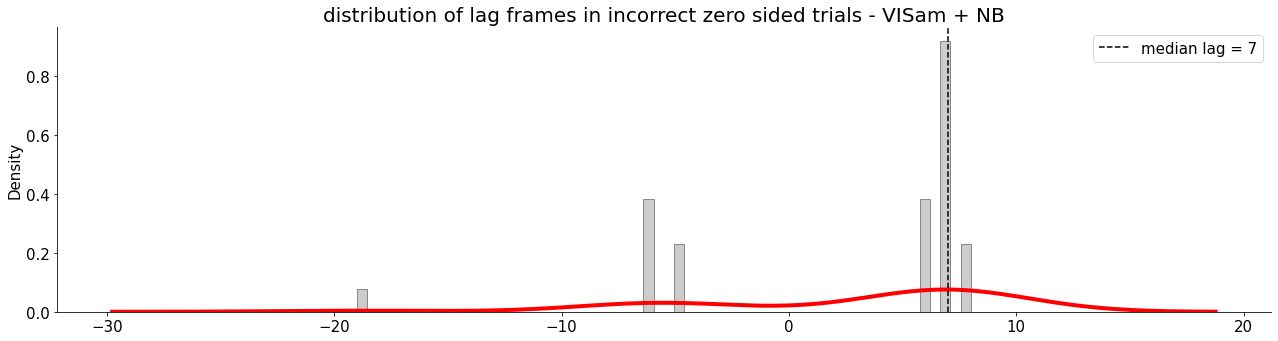

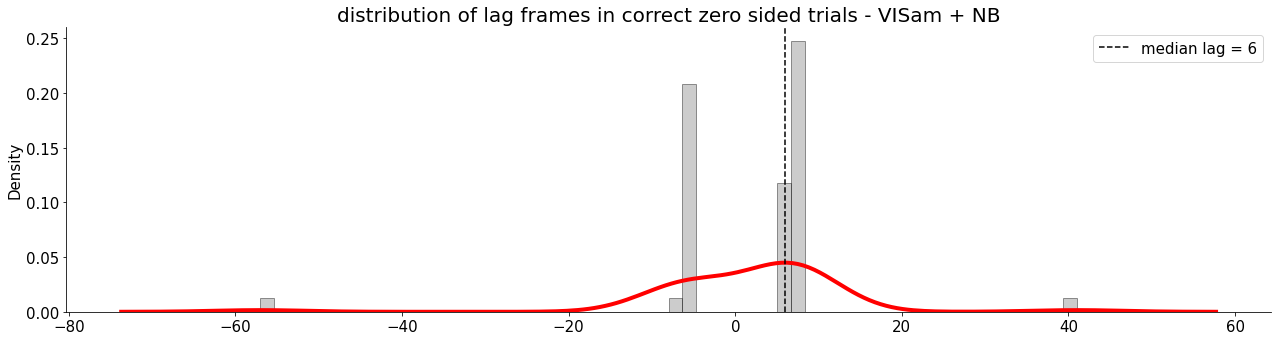

In [26]:
i = 1
j = 8
a,b,c = max_synch_lag_distrib (i_mouse = list(range(39)), sides = 0, dist_plot = True,
                        fig_size = (18,5), area1 = "VISam", area2 = "NB", values = "incorrect")


In [27]:
median_no = np.zeros((n_regions,n_regions))
corr_no = np.zeros((n_regions,n_regions))
lags_no = np.zeros((n_regions,n_regions))
median_one = np.zeros((n_regions,n_regions))
corr_one = np.zeros((n_regions,n_regions))
lags_one = np.zeros((n_regions,n_regions))
median_two = np.zeros((n_regions,n_regions))
corr_two = np.zeros((n_regions,n_regions))
lags_two = np.zeros((n_regions,n_regions))
mice = list(range(39))

start_time = timeit.default_timer()
for i in range(n_regions):
  for j in range(i+1,n_regions):
#     print(regions[i],regions[j])
#     median_no[i,j], corr_no[i,j], lags_no[i,j] = max_synch_lag_distrib(
#                                                         i_mouse = mice,
#                                                         sides = 0,                            
#                                                         area1 = regions[i], 
#                                                         area2 = regions[j]
#                                                     )
    median_one[i,j], corr_one[i,j], lags_one[i,j] = max_synch_lag_distrib(
                                                        i_mouse = mice,
                                                        sides = 1,                            
                                                        area1 = regions[i], 
                                                        area2 = regions[j]
                                                    )
    median_two[i,j], corr_two[i,j], lags_two[i,j] = max_synch_lag_distrib(
                                                        i_mouse = mice,
                                                        sides = 1,                            
                                                        area1 = regions[i], 
                                                        area2 = regions[j],
                                                        values = "incorrect",
                                                    )
elapsed = timeit.default_timer() - start_time
print("Time: ",elapsed)

Time:  16.072376893999945


In [28]:
def symmetrify(mat, fill=1):
    mat = mat + mat.T
    np.fill_diagonal(mat, fill)
    return mat

corr_one_sym = symmetrify(corr_one)
incorr_one_sym = symmetrify(corr_two)
lags_one_p = (lags_one + lags_one.T)

<AxesSubplot:>

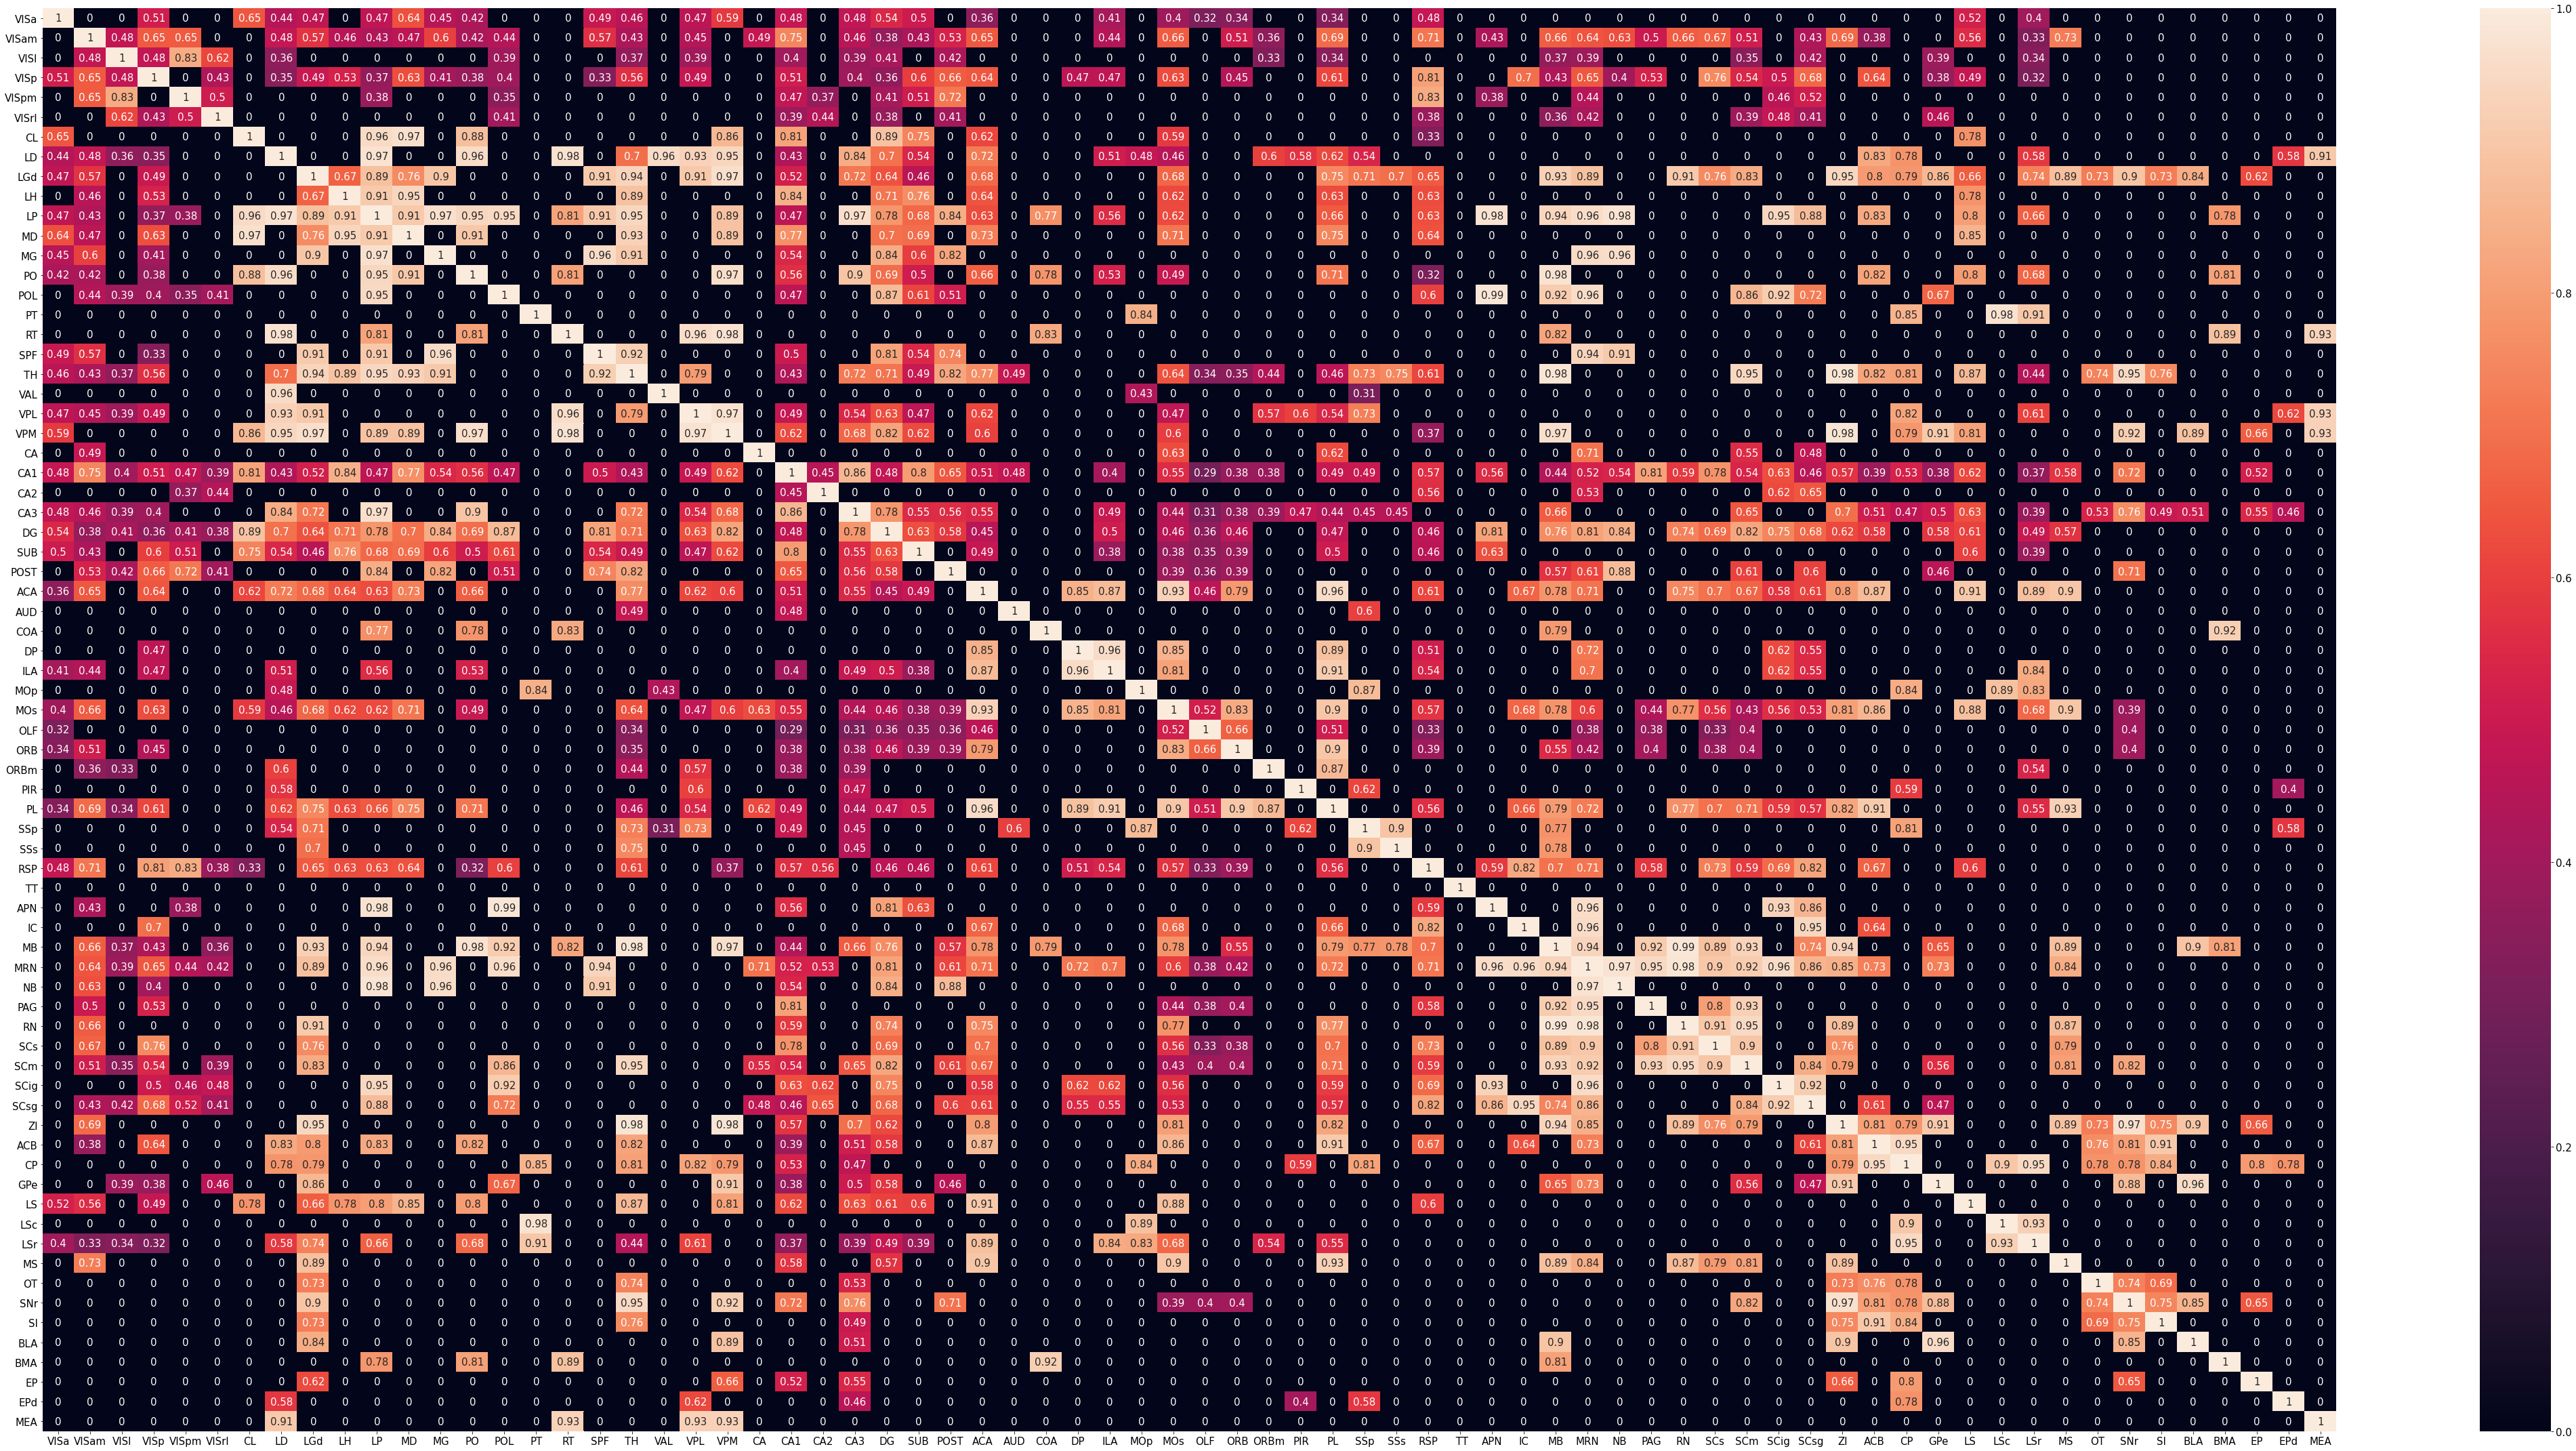

In [29]:
fig, ax = plt.subplots(figsize=(60,30)) # Sample figsize in inches
sns.heatmap(corr_one_sym, annot=True, ax=ax, xticklabels = regions, yticklabels = regions)

<AxesSubplot:>

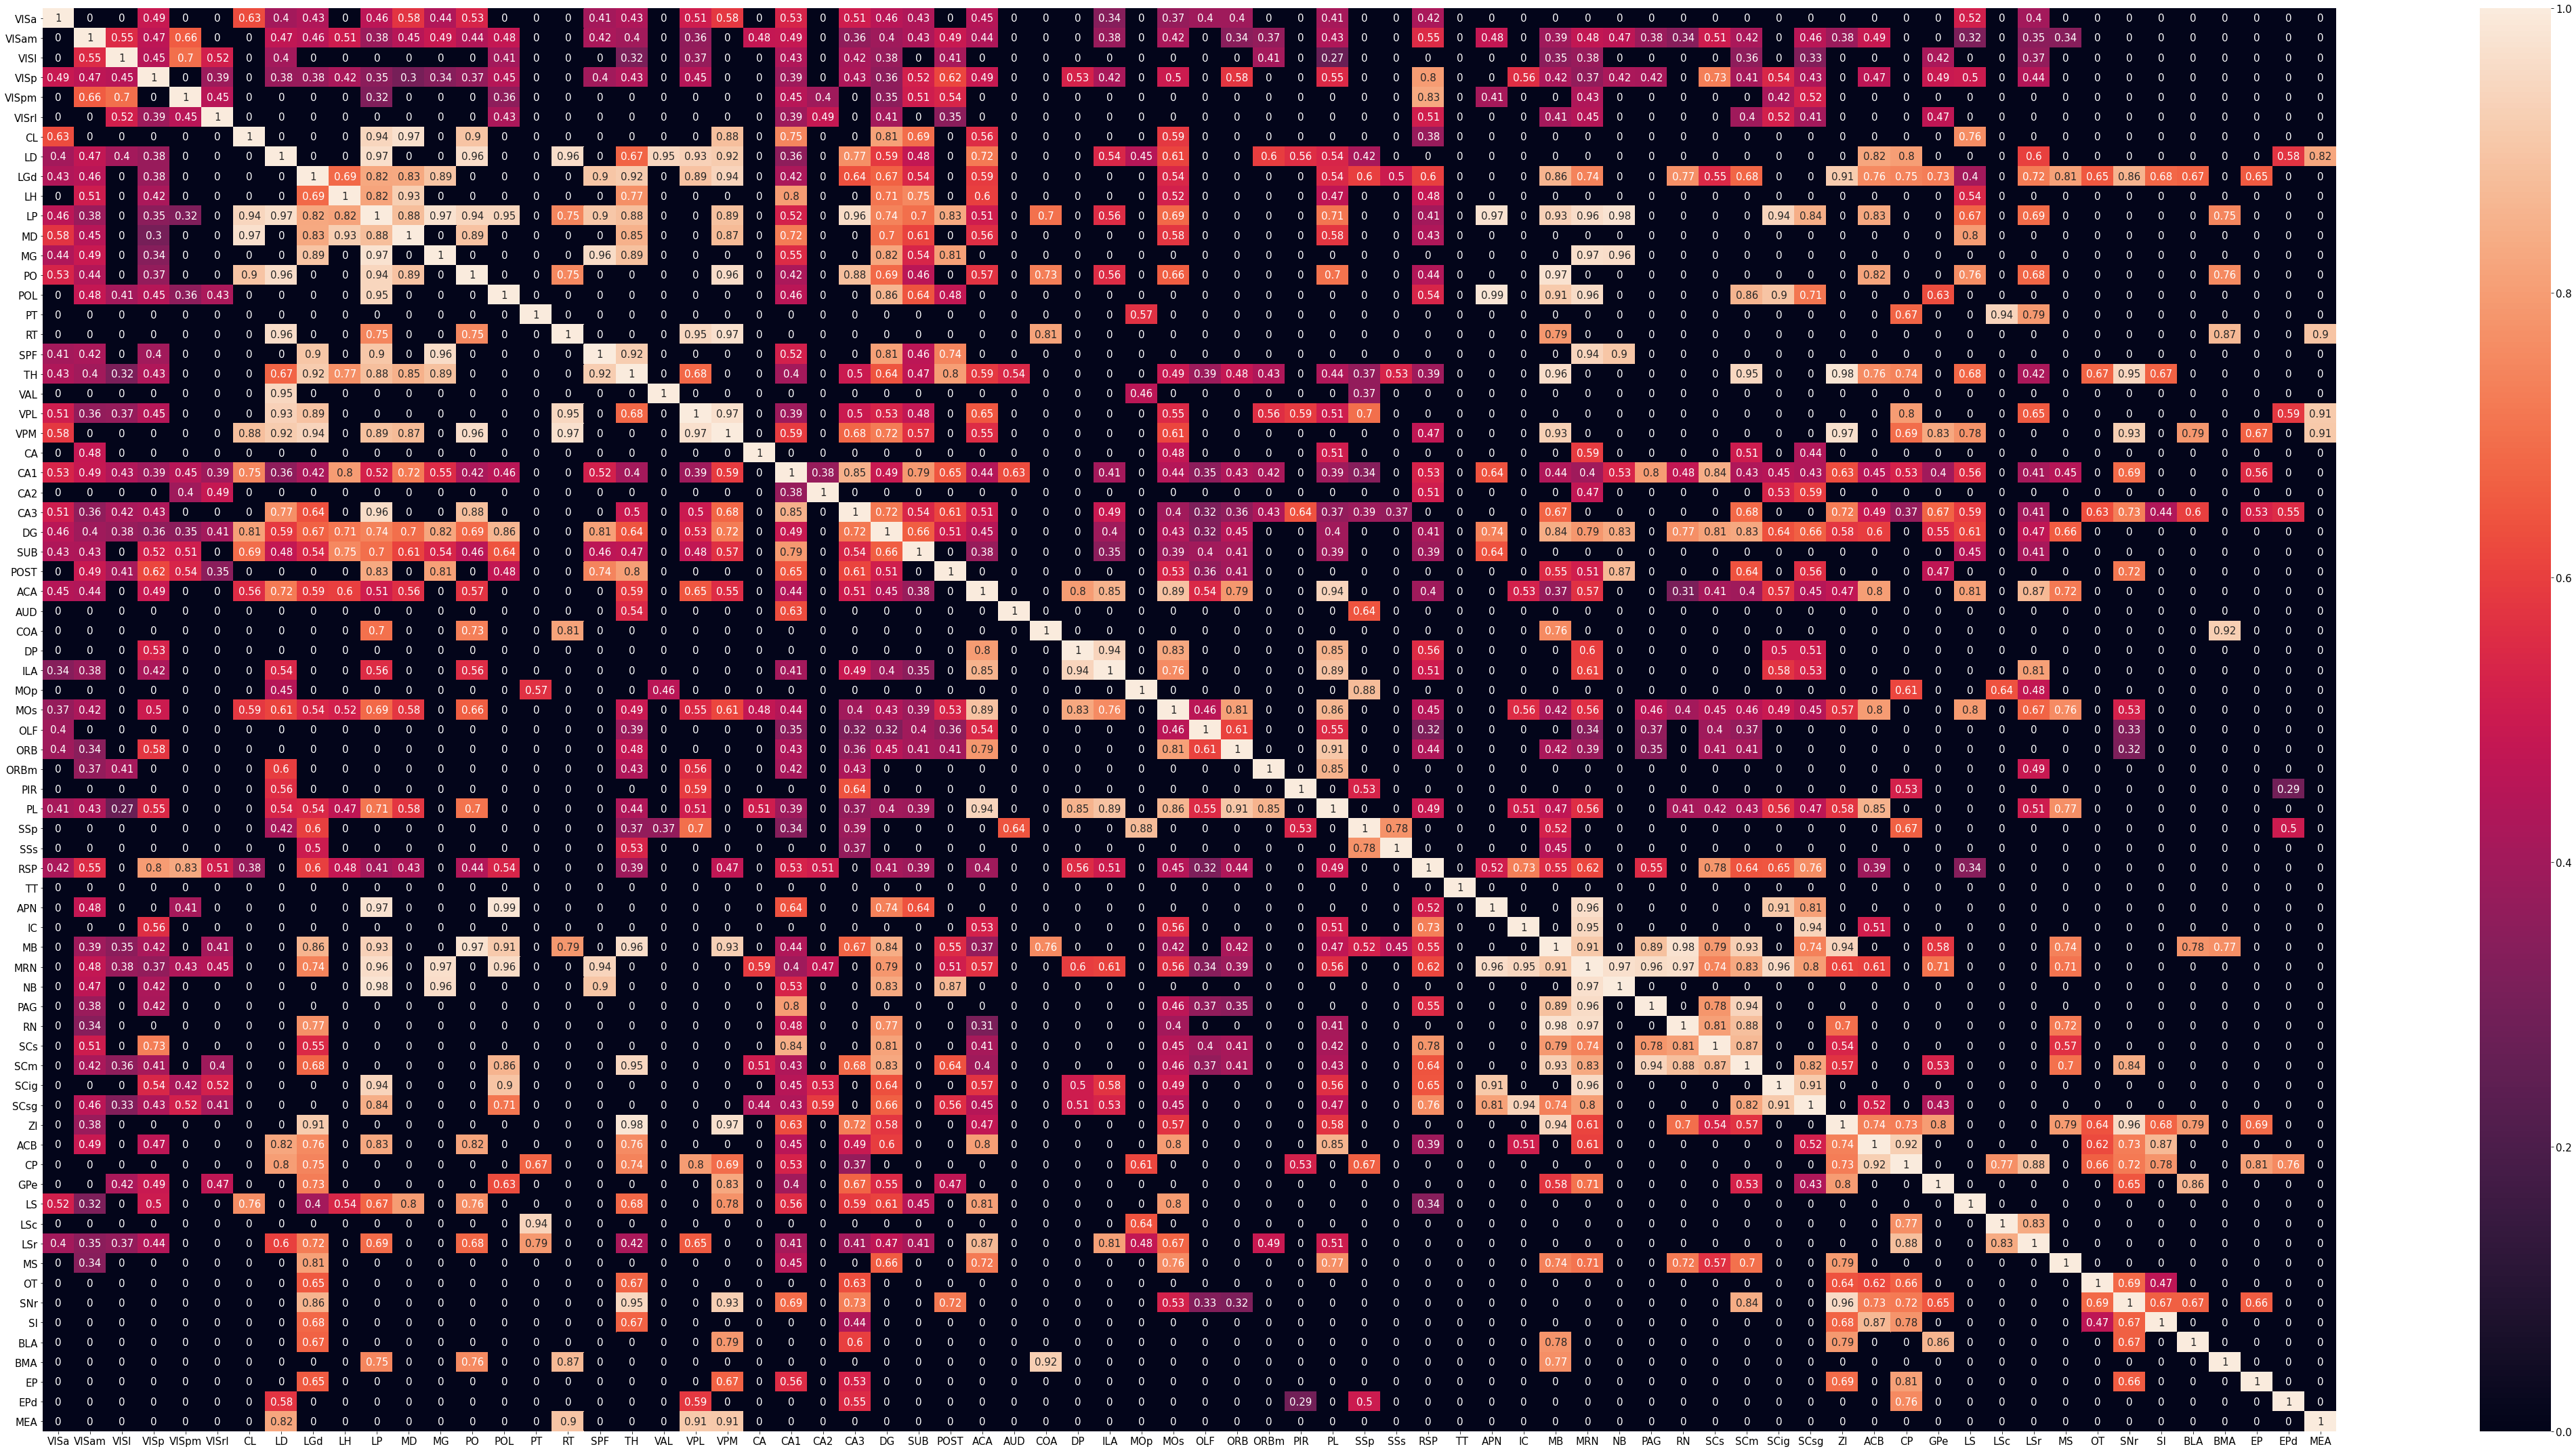

In [30]:
fig, ax = plt.subplots(figsize=(60,30)) # Sample figsize in inches
sns.heatmap(incorr_one_sym, annot=True, ax=ax, xticklabels = regions, yticklabels = regions)

<AxesSubplot:>

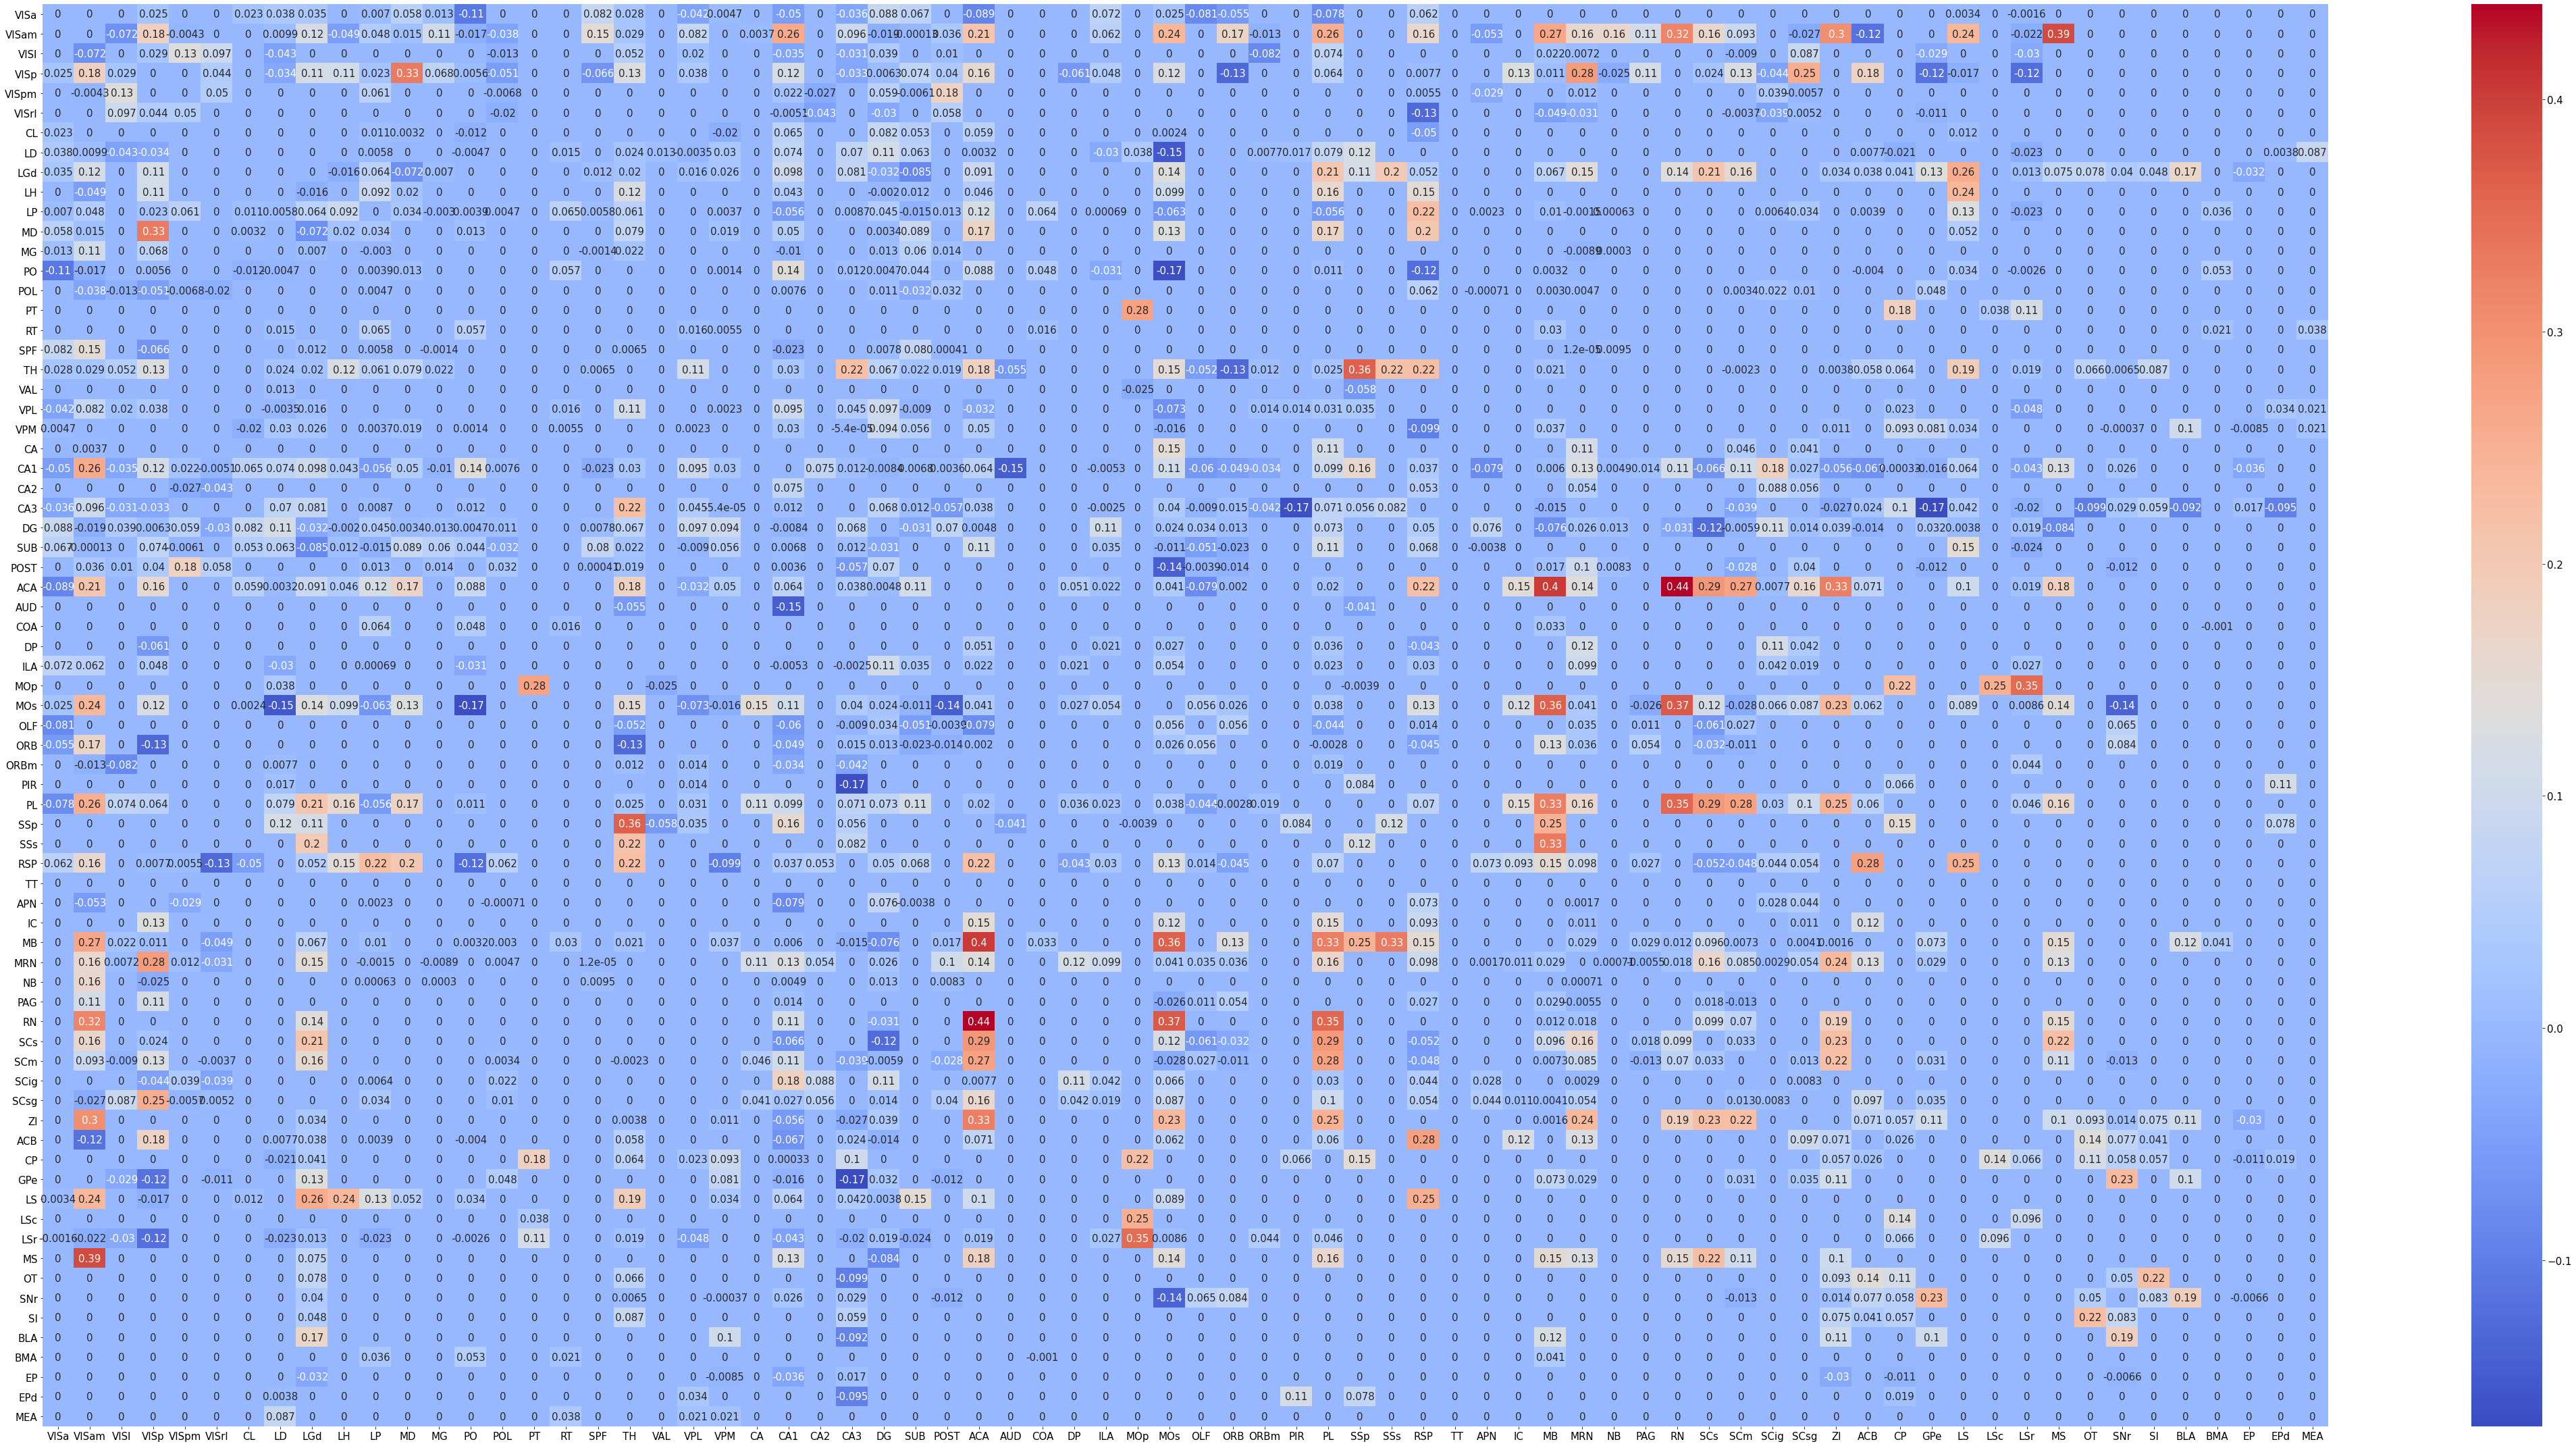

In [31]:
one_diff = corr_one_sym-incorr_one_sym
fig, ax = plt.subplots(figsize=(60,30)) # Sample figsize in inches
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(one_diff, annot=True, ax=ax, xticklabels = regions, yticklabels = regions, cmap=cmap)

<AxesSubplot:>

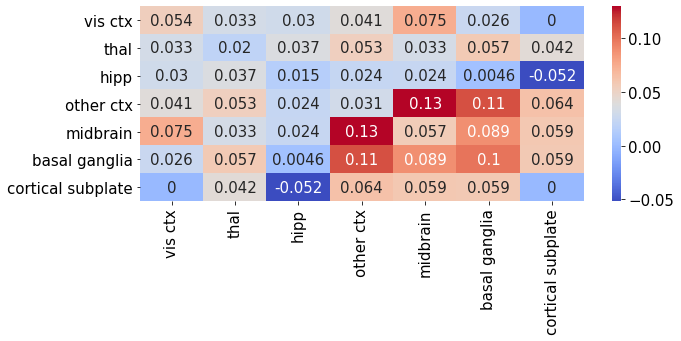

In [32]:
def consolidate_regions(mat, regions, brain_groups):
    np.fill_diagonal(mat, 0)
    n_groups = len(brain_groups)
    corr_one_regions = np.zeros((n_groups,n_groups))
    for i in range(len(brain_groups)):
        for j in range(len(brain_groups)):
            ind1 = list(map(regions.index, brain_groups[i]))
            ind2 = list(map(regions.index, brain_groups[j]))
            tot = 0
            count = 0
            for p in ind1:
                for q in ind2:
                    tot += mat[p, q]
                    count += 1 if( mat[p, q] != 0 ) else 0
            corr_one_regions[i,j] = (tot/count) if( count != 0 ) else 0
    return corr_one_regions

corr_one_regions = consolidate_regions( one_diff, regions, brain_groups )
# list(map(regions.index, brain_groups[0]))
fig, ax = plt.subplots(figsize=(10,5)) # Sample figsize in inches
sns.heatmap(corr_one_regions, annot=True, ax=ax, xticklabels = sectors, yticklabels = sectors, cmap=cmap)

Initial ordering: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Initial covariance matrix score: -249.95974838124098
Best ordering: [25  8 32  9 21 23 62  7 20 37 10 11 12 13 57  6 16 43 18 28 49 26 38 35
 46 33  3 27 17 29 40  1  0 60 36 71 30 50  4 31 69 68 42 39 55 45 52 47
 48 61 22 51 34 53 24 65 56  5 58 59 54 41 14 63 64 44 66 67  2 15 70 19]
Best score: 60.63649557507358
Cluster     [variables assigned to this cluster]
------------------------------------------------
Cluster 01  [25  8 32  9 21 23 62  7 20 37 10 11 12 13 57  6 16 43 18 28 49 26 38 35
 46 33  3 27 17 29 40  1  0 60 36 71]
Cluster 02  [30 50  4 31 69 68 42 39 55 45 52 47 48 61 22 51 34 53 24 65 56  5 58 59
 54 41 14 63 64 44 66 67  2 15 70 19]
Initial ordering: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26

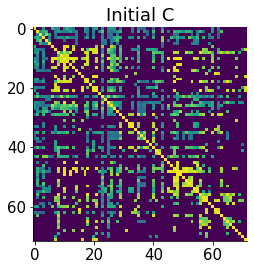

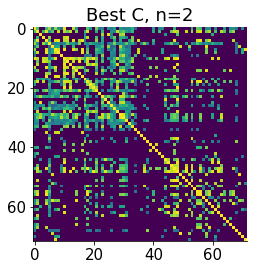

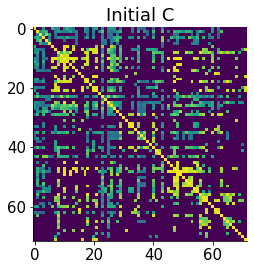

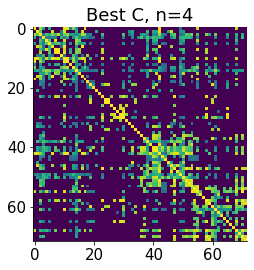

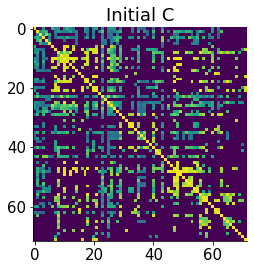

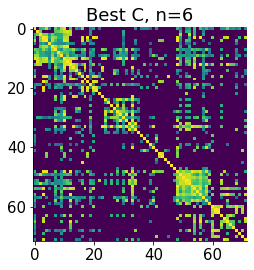

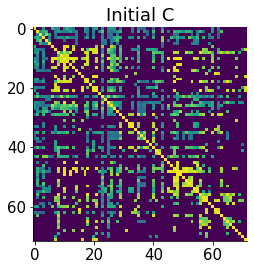

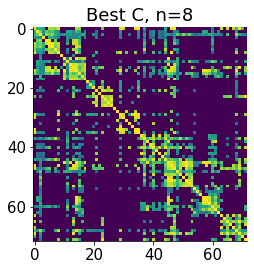

In [213]:
for n_clusters in [2,4,6,8]:
    # This generates 100 variables that could possibly be assigned to 5 clusters
    n_variables = 72
#     n_clusters = 8
    n_samples = 1000

    # To keep this example simple, each cluster will have a fixed size
    cluster_size = n_variables // n_clusters

    # Assign each variable to a cluster
    belongs_to_cluster = np.repeat(range(n_clusters), cluster_size)
    np.random.shuffle(belongs_to_cluster)

    # This latent data is used to make variables that belong
    # to the same cluster correlated.
    latent = np.random.randn(n_clusters, n_samples)

    variables = []
    for i in range(n_variables):
        variables.append(
            np.random.randn(n_samples) + latent[belongs_to_cluster[i], :]
        )

    variables = np.array(variables)

    C = np.cov(variables)

    def score(C):
        '''
        Function to assign a score to an ordered covariance matrix.
        High correlations within a cluster improve the score.
        High correlations between clusters decease the score.
        '''
        score = 0
        for cluster in range(n_clusters):
            inside_cluster = np.arange(cluster_size) + cluster * cluster_size
            outside_cluster = np.setdiff1d(range(n_variables), inside_cluster)

            # Belonging to the same cluster
            score += np.sum(C[inside_cluster, :][:, inside_cluster])

            # Belonging to different clusters
            score -= np.sum(C[inside_cluster, :][:, outside_cluster])
            score -= np.sum(C[outside_cluster, :][:, inside_cluster])

        return score

    C = corr_one_sym
    initial_C = C
    initial_score = score(C)
    initial_ordering = np.arange(n_variables)

    plt.figure()
    plt.imshow(C, interpolation='nearest')
    plt.title('Initial C')
    print( 'Initial ordering:', initial_ordering )
    print( 'Initial covariance matrix score:', initial_score )

    # Pretty dumb greedy optimization algorithm that continuously
    # swaps rows to improve the score
    def swap_rows(C, var1, var2):
        '''
        Function to swap two rows in a covariance matrix,
        updating the appropriate columns as well.
        '''
        D = C.copy()
        D[var2, :] = C[var1, :]
        D[var1, :] = C[var2, :]

        E = D.copy()
        E[:, var2] = D[:, var1]
        E[:, var1] = D[:, var2]

        return E

    current_C = C
    current_ordering = initial_ordering
    current_score = initial_score

    max_iter = 10000
    for i in range(max_iter):
        # Find the best row swap to make
        best_C = current_C
        best_ordering = current_ordering
        best_score = current_score
        for row1 in range(n_variables):
            for row2 in range(n_variables):
                if row1 == row2:
                    continue
                option_ordering = best_ordering.copy()
                option_ordering[row1] = best_ordering[row2]
                option_ordering[row2] = best_ordering[row1]
                option_C = swap_rows(best_C, row1, row2)
                option_score = score(option_C)

                if option_score > best_score:
                    best_C = option_C
                    best_ordering = option_ordering
                    best_score = option_score

        if best_score > current_score:
            # Perform the best row swap
            current_C = best_C
            current_ordering = best_ordering
            current_score = best_score
        else:
            # No row swap found that improves the solution, we're done
            break

    # Output the result
    plt.figure()
    plt.imshow(current_C, interpolation='nearest')
    plt.title('Best C, n='+str(n_clusters))
    print( 'Best ordering:', current_ordering)
    print( 'Best score:', current_score)
    print( 'Cluster     [variables assigned to this cluster]')
    print( '------------------------------------------------')
    for cluster in range(n_clusters):
        print( 'Cluster %02d  %s' % (cluster + 1, current_ordering[cluster*cluster_size:(cluster+1)*cluster_size]))

In [140]:
mylist = [ regions[i] for i in current_ordering]
# print(mylist)
current_C.shape

(72, 72)

<AxesSubplot:>

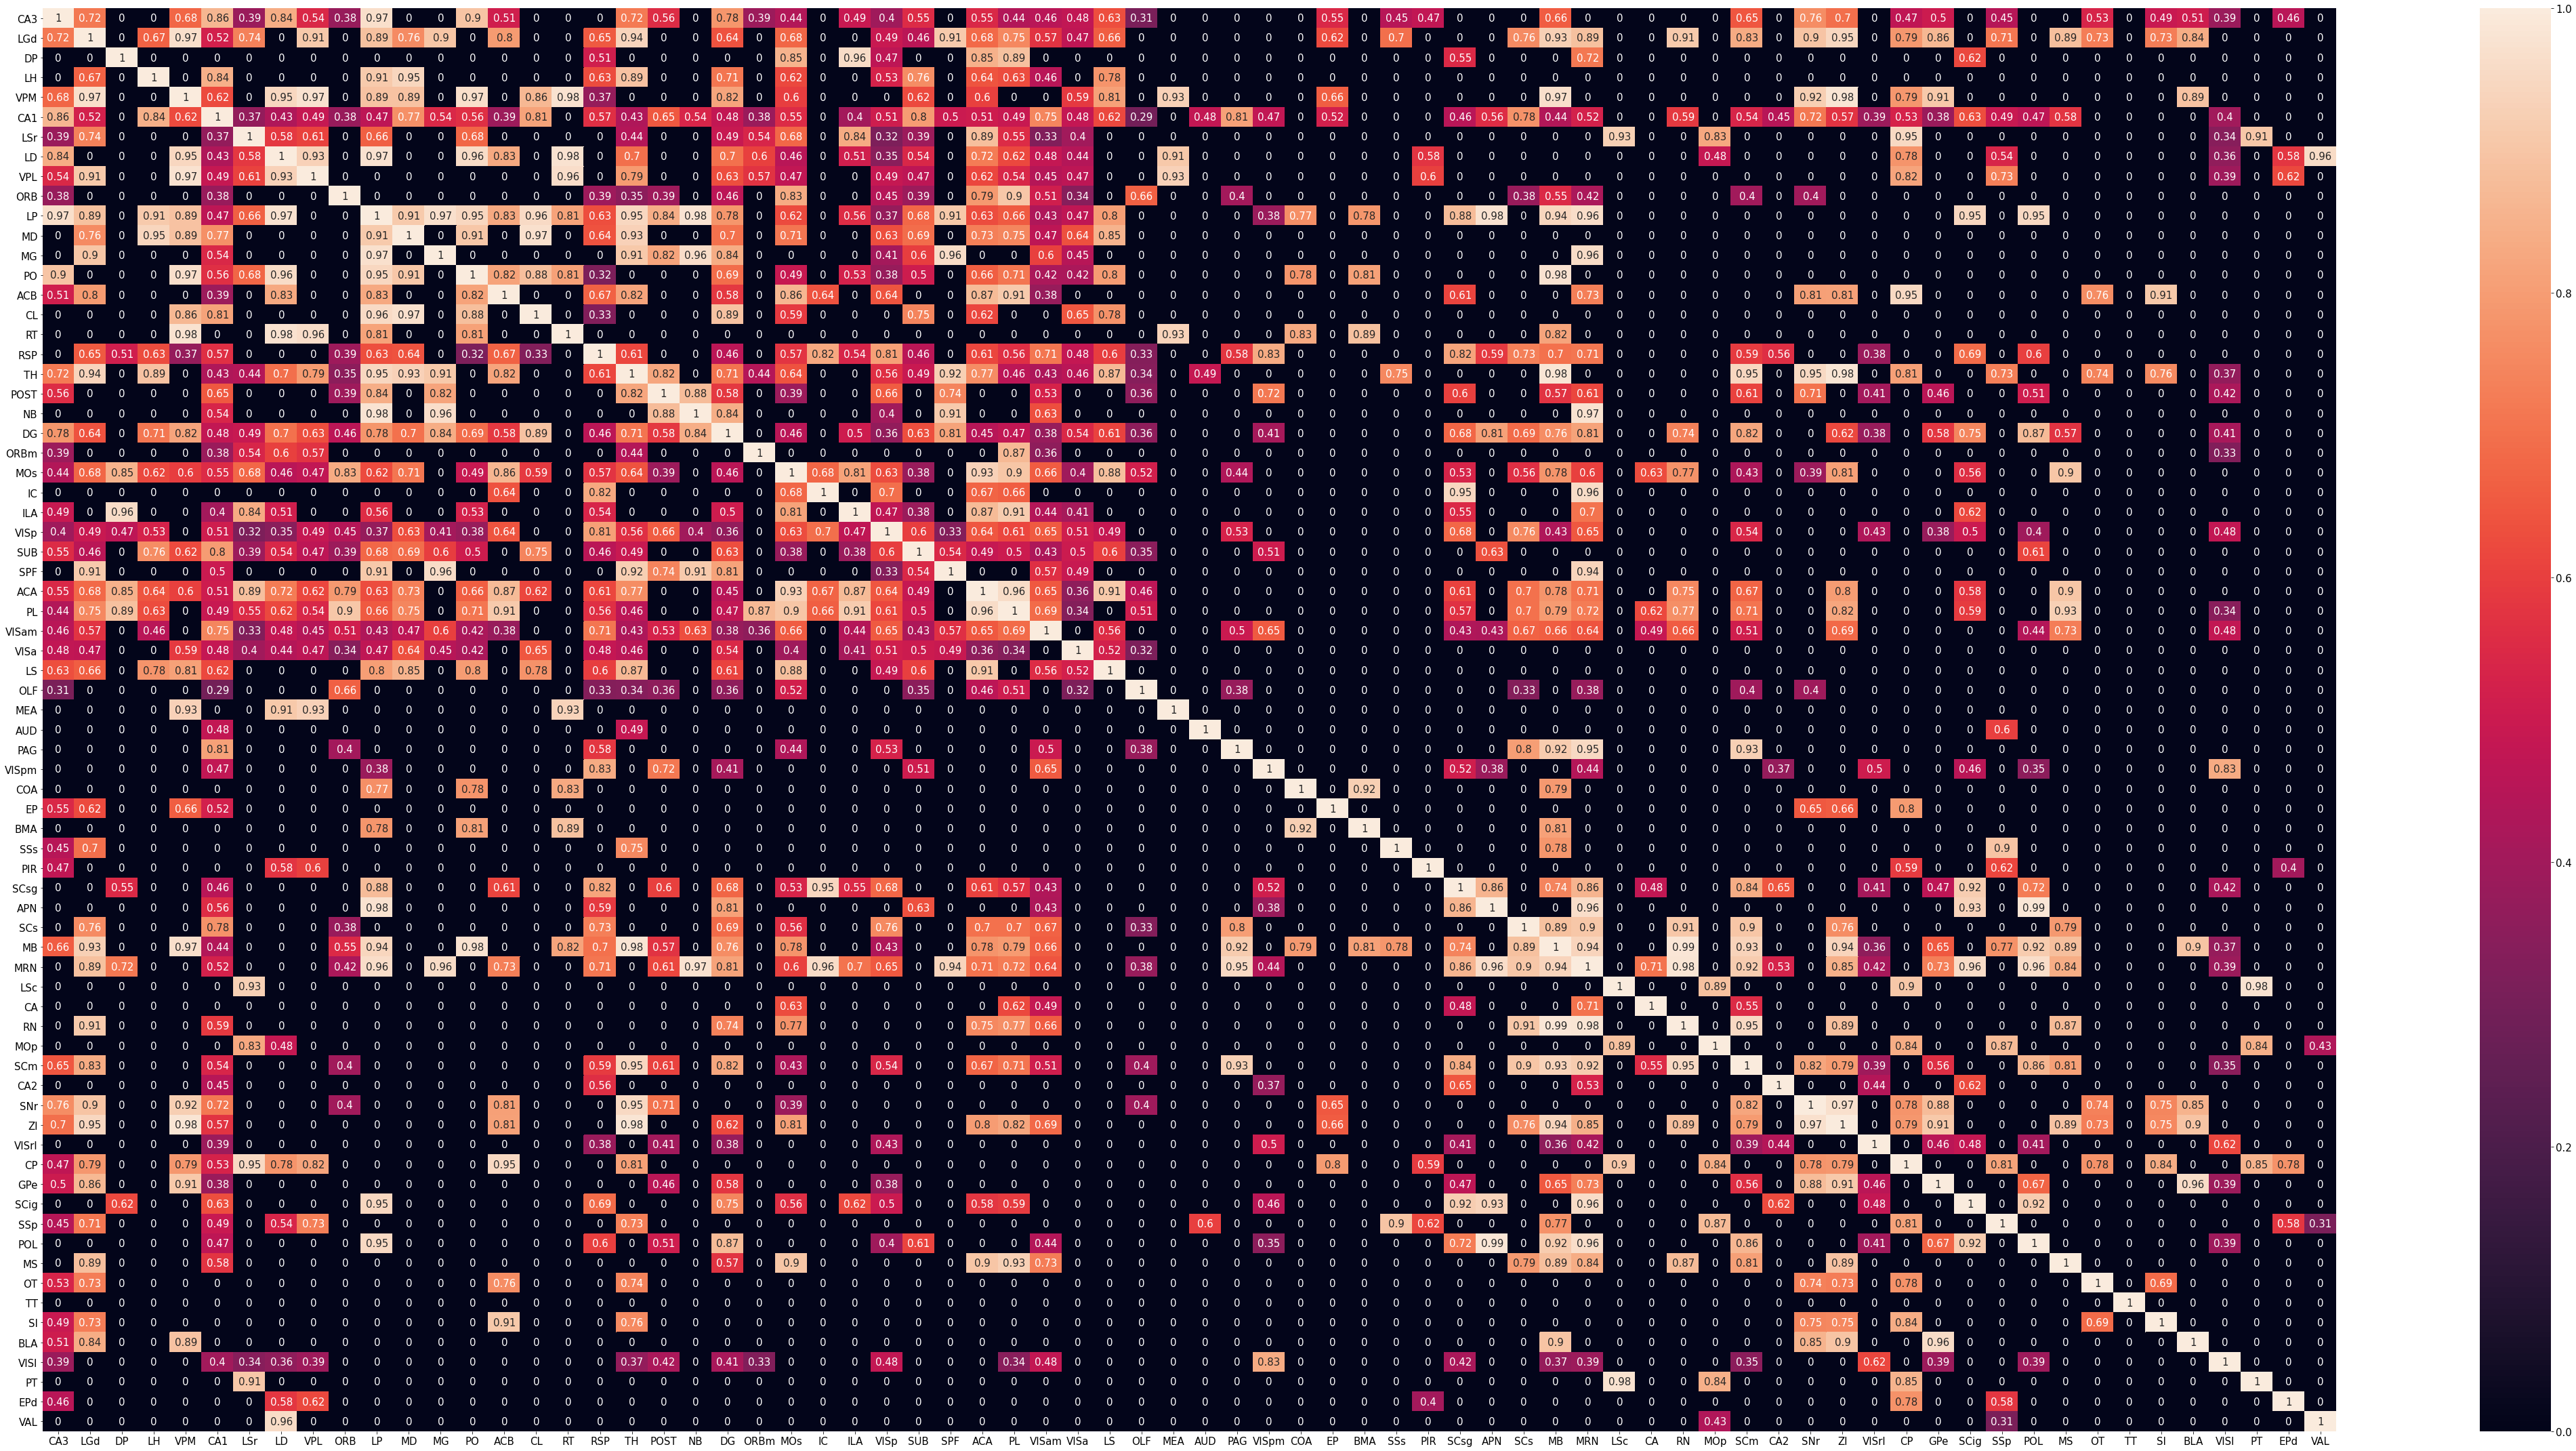

In [141]:
fig, ax = plt.subplots(figsize=(60,30)) # Sample figsize in inches
sns.heatmap(current_C, annot=True, ax=ax, xticklabels = mylist, yticklabels = mylist)

In [29]:
import scipy.cluster.hierarchy as spc
pdist = spc.distance.pdist(corr_one_sym)
linkage = spc.linkage(pdist, method='complete')
idx = spc.fcluster(linkage, 0.5 * pdist.max(), 'distance')
corr_one_1 = corr_one_sym[:, idx]
corr_one_2 = corr_one_1[idx,:]
mylist = [ regions[i] for i in idx ]

In [30]:
print(pdist)

[3.04787938 2.86311062 2.71593969 ... 2.27640041 2.66259754 2.2930956 ]


<AxesSubplot:>

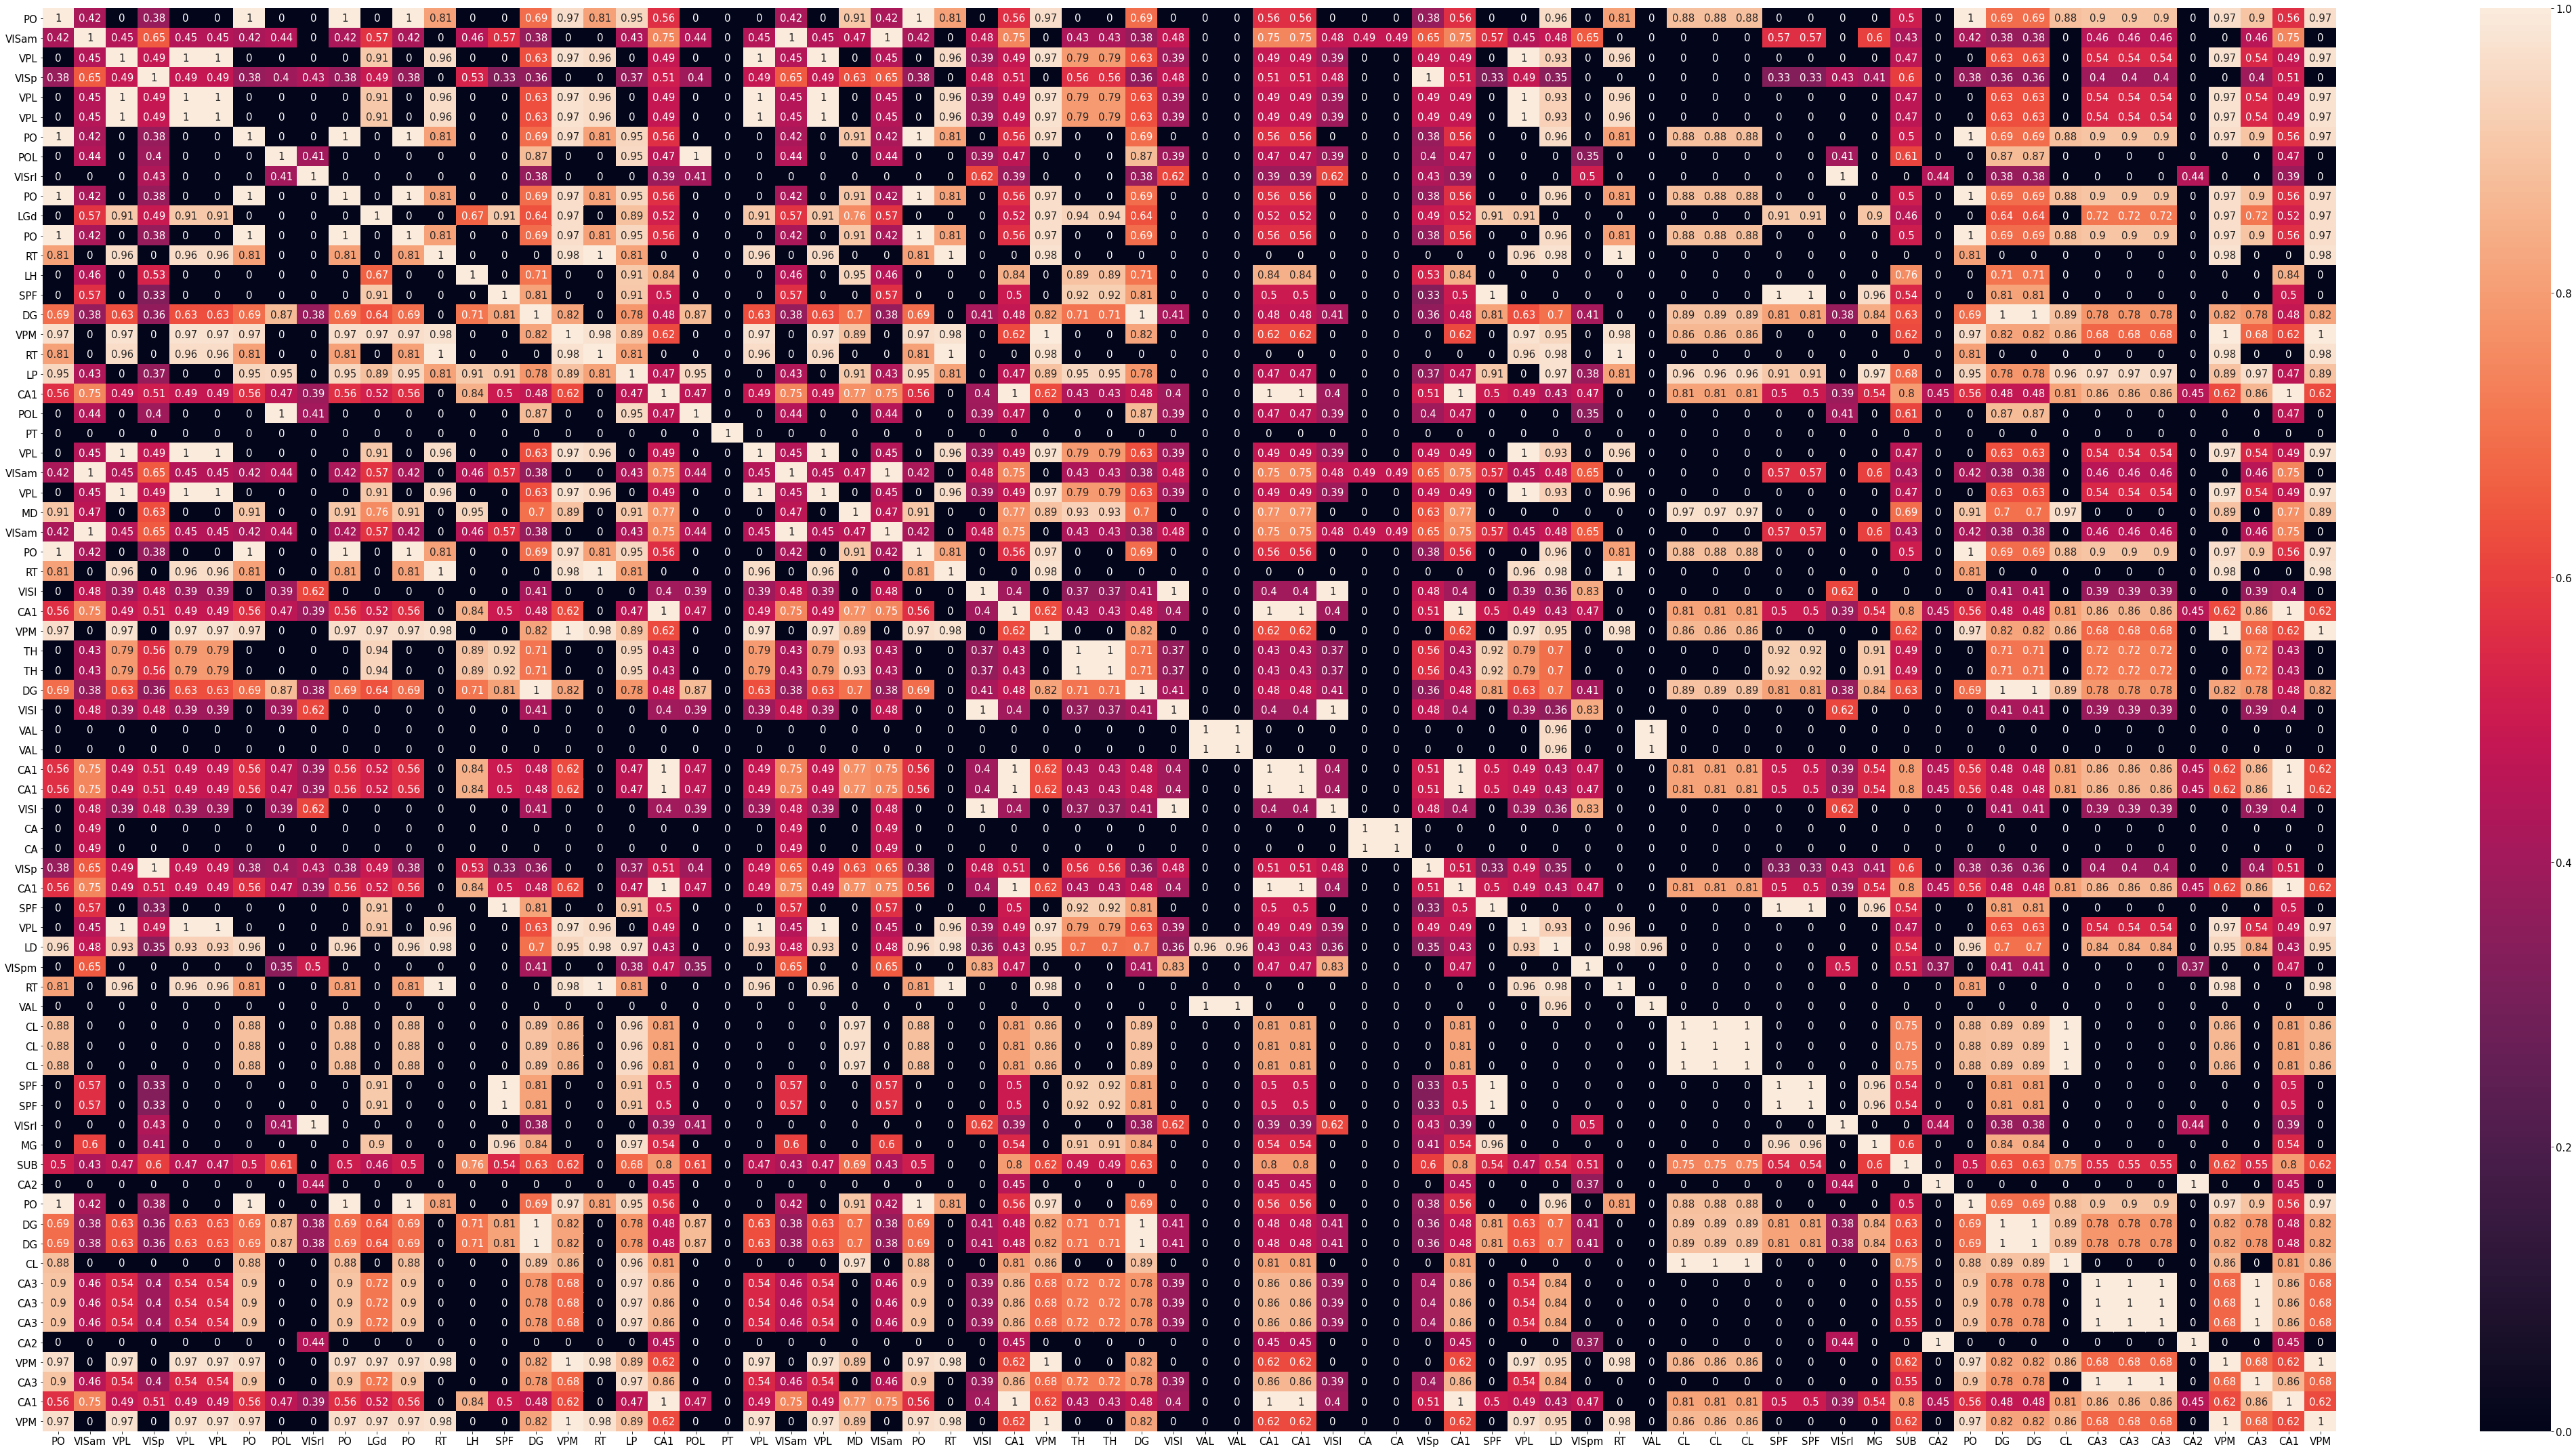

In [208]:
fig, ax = plt.subplots(figsize=(60,30)) # Sample figsize in inches
sns.heatmap(corr_one_2, annot=True, ax=ax, xticklabels = mylist, yticklabels = mylist)

In [31]:
from sklearn.manifold import TSNE
# X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(corr_one_sym)
X_embedded.shape

(72, 2)

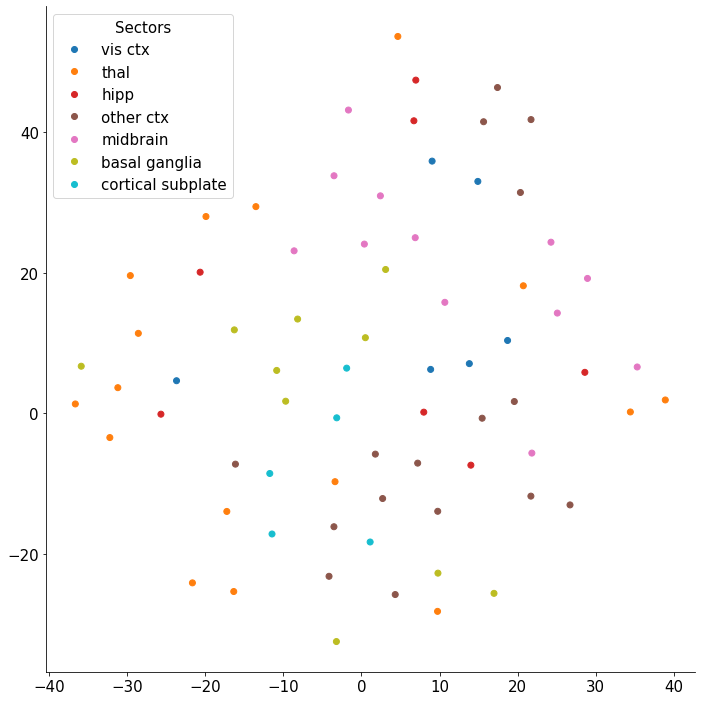

In [97]:
fig, ax = plt.subplots(figsize=(10,10)) # Sample figsize in inches
cmap = sns.color_palette("tab10", as_cmap=True)
scatter = ax.scatter(X_embedded[:,0], X_embedded[:,1], c=regions_color, cmap=cmap)
legend = scatter.legend_elements(func=lambda x: x)
for i in range(n_groups):
    legend[1][i] = sectors[i]
legend1 = ax.legend(*legend, title="Sectors")
plt.show()

['$\\mathdefault{0}$',
 '$\\mathdefault{1}$',
 '$\\mathdefault{2}$',
 '$\\mathdefault{3}$',
 '$\\mathdefault{4}$',
 '$\\mathdefault{5}$',
 '$\\mathdefault{6}$']

In [ ]:
# with np.printoptions(threshold=np.inf):
#     print(corr_no)
# corr_bak = corr_no
# print(corr_no.shape)
mod3= corr_one[~np.all(corr_one == 0, axis=1)]
mod4 = mod3[:,~np.all(mod3 == 0, axis=0)]
# print(mod2.shape)
# sns.heatmap(mod2, square=True)


In [ ]:
sns.heatmap(mod4, square=True, xticklabels = regions, yticklabels = regions)

In [174]:
i1 = list(map(regions.index, brain_groups[0]))
i2 = list(map(regions.index, brain_groups[0]))
i11 = tuple(slice(x) for x in i1)
print(regions[i1])
# i22 = slice(x) for x in i2
fig, ax = plt.subplots(figsize=(50,30)) # Sample figsize in inches
a = corr_one[i1]
b = a[:,i2]
sns.heatmap(b, annot=True, ax=ax, xticklabels = regions[i11], yticklabels = regions[i22]) 

TypeError: list indices must be integers or slices, not list

In [148]:
from sklearn.cluster import AgglomerativeClustering
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering().fit(X)
clustering

clustering.labels_

array([1, 1, 1, 0, 0, 0])

In [94]:
# correct_one_trials[11]
inds = np.arange(0, len(correct_one_trials[11]))[correct_one_trials[11]]

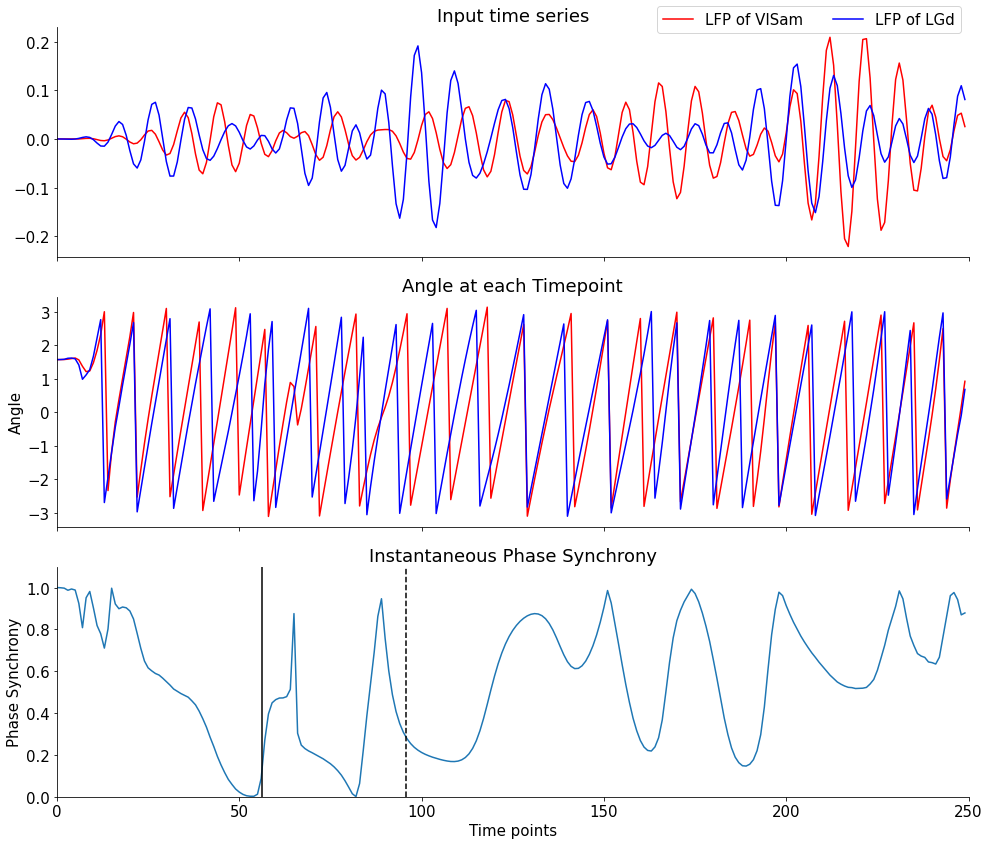

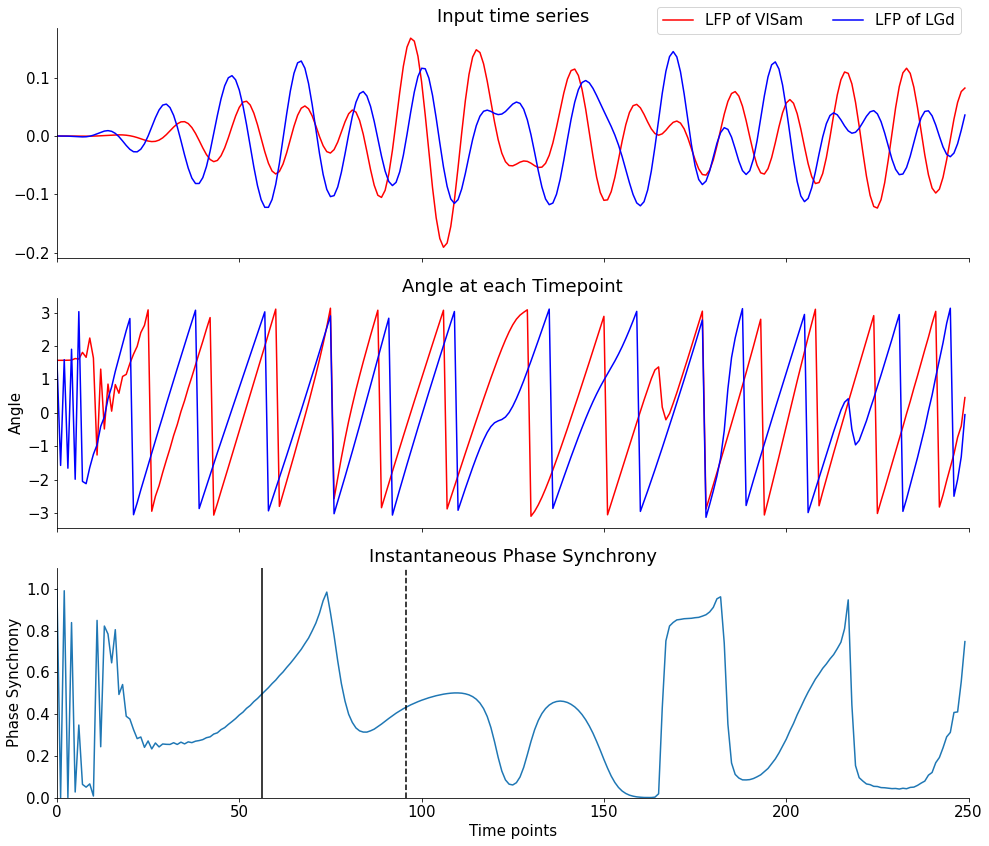

In [133]:
def phase_synch (sig1 = smooth_sig1, sig2 = smooth_sig2, trial_num = 1, area1 = area1, area2=area2,
                fig_size = (14,12), plot_ph= True):
    """
    This function is to compute and plot the phase synchrony. 

    Args:
    sig1: input signal 1
    sig2: input signal 2
    trial_num: number of trial that we inspect
    area1: area of signal 1
    area2: area of signal 2
    fig_size: fig size
    plot_ph: boolean, if you want to plot the phase synchrony

    Outputs:
    ang1: vector of phase angles of signal 1 across time frames (this is not in ms) in radian
    ang2: vector of phase angles of signal 2 across time frames (this is not in ms) in radian
    phase_synchrony: quantifying the synchrony power of two phases at each time frame, calculated as:
     phase_synchrony = 1-np.sin(np.abs(ang1-ang2)/2)
    


    """
   
    ang1 = np.angle(signal.hilbert(sig1),deg=False) #use filter hilbert to separate the signal into real and imaginary parts and 
    ang2 = np.angle(signal.hilbert(sig2),deg=False)   # extract the angle from the imaginary part, deg = False=> angles in radian

    phase_synchrony = 1-np.sin(np.abs(ang1-ang2)/2)
    N = len(ang1)

    # Plot results
    # temp_inp = input ("do you want to visualize the results? y/n")
    if plot_ph:
        f,ax = plt.subplots(3,1,figsize=fig_size,sharex=True)
        ax[0].plot(sig1,color='r',label= f'LFP of {area1}')
        ax[0].plot(sig2,color='b',label= f'LFP of {area2}')
        ax[0].legend(bbox_to_anchor=(0., 1.02, 1., .102),ncol=2)
        ax[0].set(xlim=[0,N], title='Input time series')

        ax[1].plot(ang1,color='r')
        ax[1].plot(ang2,color='b')
        ax[1].set(ylabel='Angle',title='Angle at each Timepoint',xlim=[0,N])
   
        ax[2].plot(phase_synchrony)
        ax[2].set(ylim=[0,1.1],xlim=[0,N],title='Instantaneous Phase Synchrony',xlabel='Time points',ylabel='Phase Synchrony')
       # time points are not in seconds
        go_cue = (dat["gocue"])[trial_num] * 100
        resp_time = (dat["response_time"])[trial_num] * 100

        ax[2].axvline(resp_time,ls = '--', color = 'black', label = "response time")
        ax[2].axvline(go_cue,ls = '-', color = 'black', label = "go cue time")
        plt.tight_layout()
#         plt.legend()
        # plt.show()

    return [ang1, ang2, phase_synchrony]

mouse = 11
region1 = 1
region2 = 2
trial = inds[15]
a_ps = phase_synch(dat_LFP_all[mouse]['alpha_lfp'][region1,trial],dat_LFP_all[0]['alpha_lfp'][region2,trial])
T_ps = phase_synch(dat_LFP_all[mouse]['theta_lfp'][region1,trial],dat_LFP_all[0]['theta_lfp'][region2,trial])

In [151]:
i = 11
area1 = "VISam"
area2 = "LGd"
signal_type = "alpha_lfp"
correct_trials = correct_one_trials[i]
incorrect_trials = incorrect_one_trials[i]
correct_len = np.sum(correct_trials) # total number of correct trials
incorrect_len = np.sum(incorrect_trials) #total number of incorrect trials
total_trial = len(alldat[i]['response'])
correct_trials_ind = np.arange(0, total_trial)[correct_trials]  # get the indexes for correct trials
incorrect_trials_ind = np.arange(0, total_trial)[incorrect_trials] # get the indexes for incorrect trials

region1 = dat_LFP_all[i]['brain_area_lfp'].index(area1)
region2 = dat_LFP_all[i]['brain_area_lfp'].index(area2)
sig1 = dat_LFP_all[mouse][signal_type][region1,correct_trials_ind]
sig2 = dat_LFP_all[mouse][signal_type][region2,correct_trials_ind]

ang1 = np.angle(signal.hilbert(sig1),deg=False) #use filter hilbert to separate the signal into real and imaginary parts and 
ang2 = np.angle(signal.hilbert(sig2),deg=False)   # extract the angle from the imaginary part, deg = False=> angles in radian
ang11 = np.mean(ang1, axis=0)
ang12 = np.mean(ang2, axis=0)
phase_synchrony1 = 1-np.sin(np.abs(ang11-ang12)/2)
phase_synchrony = 1-np.sin(np.abs(ang1-ang2)/2)
phase_sync_mean = np.mean(phase_synchrony, axis=0)
print(phase_sync_mean.shape, phase_synchrony1.shape)
print(phase_sync_mean == phase_synchrony1)

(108, 250) (250,)
(250,) (250,)
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False 

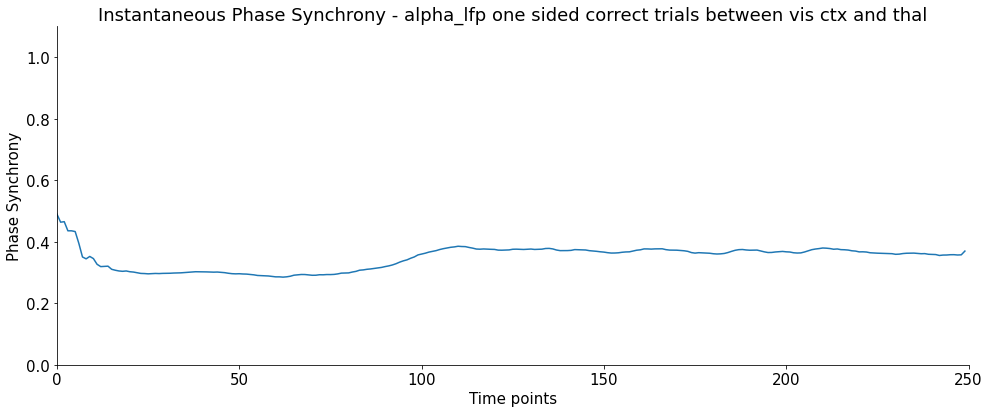

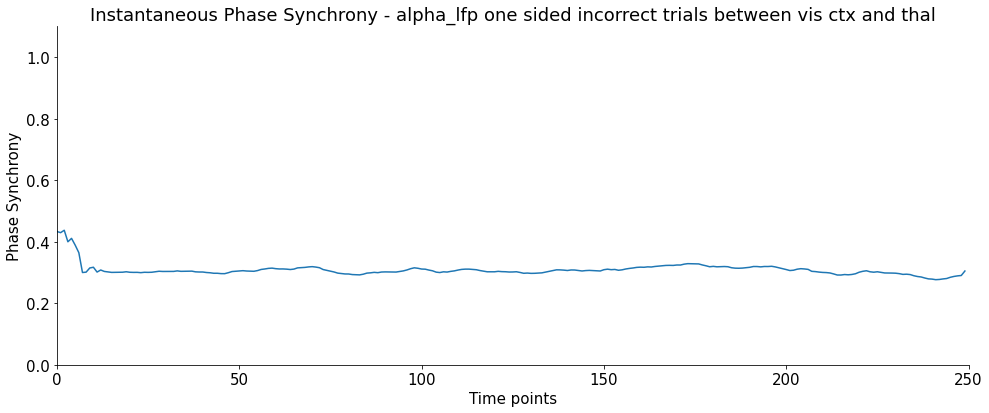

In [213]:
def phase_synch_batch (i_mouse = [11], sides = 1, dist_plot = False, signal_type = "alpha_lfp",
                           fig_size = (14,6), group1 = 0, group2 = 1,
                           values = "correct" ):
    """
    This function is to compute and plot the phase synchrony. 

    Args:
    i_mouse: array of mice to consider
    sides: enum(0,1,2) - to pick how many sided stimuli to consider
    dist_plot: boolean, whether to plot or not
    signal_type: enum("alpha_lfp", "theta_lfp") - pick alpha or theta band
    fig_size: figure size of each plot
    group1: Index of first area group
    group2: Index of second area group
    values: whether to return values for "correct" or "incorrect" trials

    Outputs:
    ang1: vector of phase angles of signal 1 across time frames (this is not in ms) in radian
    ang2: vector of phase angles of signal 2 across time frames (this is not in ms) in radian
    phase_synchrony: quantifying the synchrony power of two phases at each time frame, calculated as:
    phase_synchrony = 1-np.sin(np.abs(ang1-ang2)/2)
    """
    phase_sync_arr = []
    for area1 in brain_groups[group1]:
        for area2 in brain_groups[group2]:
            for i in i_mouse:
                if not (area1 in dat_LFP_all[i]['brain_area_lfp'] and area2 in dat_LFP_all[i]['brain_area_lfp']):
                    continue
                if(sides == 0):
                    correct_trials = correct_zero_trials[i]
                    incorrect_trials = incorrect_zero_trials[i]
                    trial_type = "zero sided"
                if(sides == 1):
                    correct_trials = correct_one_trials[i]
                    incorrect_trials = incorrect_one_trials[i]
                    trial_type = "one sided"
                if(sides == 2):
                    correct_trials = correct_two_trials[i]
                    incorrect_trials = incorrect_two_trials[i]
                    trial_type = "two sided"

                correct_len = np.sum(correct_trials) # total number of correct trials
                incorrect_len = np.sum(incorrect_trials) #total number of incorrect trials
                total_trial = len(alldat[i]['response'])
                correct_trials_ind = np.arange(0, total_trial)[correct_trials]  # get the indexes for correct trials
                incorrect_trials_ind = np.arange(0, total_trial)[incorrect_trials] # get the indexes for incorrect trials

                if values == "correct":
                    trials = correct_trials_ind
                else:
                    trials = incorrect_trials_ind

                region1 = dat_LFP_all[i]['brain_area_lfp'].index(area1)
                region2 = dat_LFP_all[i]['brain_area_lfp'].index(area2)
                sig1 = dat_LFP_all[i][signal_type][region1,trials]
                sig2 = dat_LFP_all[i][signal_type][region2,trials]

                ang1 = np.angle(signal.hilbert(sig1),deg=False) #use filter hilbert to separate the signal into real and imaginary parts and 
                ang2 = np.angle(signal.hilbert(sig2),deg=False)   # extract the angle from the imaginary part, deg = False=> angles in radian
                phase_synchrony_ind = 1-np.sin(np.abs(ang1-ang2)/2)
                if len(phase_sync_arr):
                    phase_sync_arr = np.vstack((phase_sync_arr, phase_synchrony_ind))
                else:
                    phase_sync_arr = phase_synchrony_ind
    if(len(phase_sync_arr)==0):
        return[0,0,0]
    phase_synchrony = np.mean(phase_sync_arr, axis=0)
    N = len(phase_synchrony)
    # Plot results
    # temp_inp = input ("do you want to visualize the results? y/n")
    if dist_plot:
        f,ax = plt.subplots(1,1,figsize=fig_size,sharex=True)
        ax.plot(phase_synchrony)
        ax.set(ylim=[0,1.1],xlim=[0,N],
               title=f"Instantaneous Phase Synchrony - {signal_type} {trial_type} {values} trials between {sectors[group1]} and {sectors[group2]}",
               xlabel='Time points',ylabel='Phase Synchrony')
        plt.tight_layout()

    return [ang1, ang2, phase_synchrony]

a_ps = phase_synch_batch(i_mouse = mice, dist_plot = True, values='correct')
a_ps = phase_synch_batch(i_mouse = mice, dist_plot = True, values='incorrect')

<ipython-input-200-6fe4b7dd0c02>:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f,ax = plt.subplots(1,1,figsize=fig_size,sharex=True)


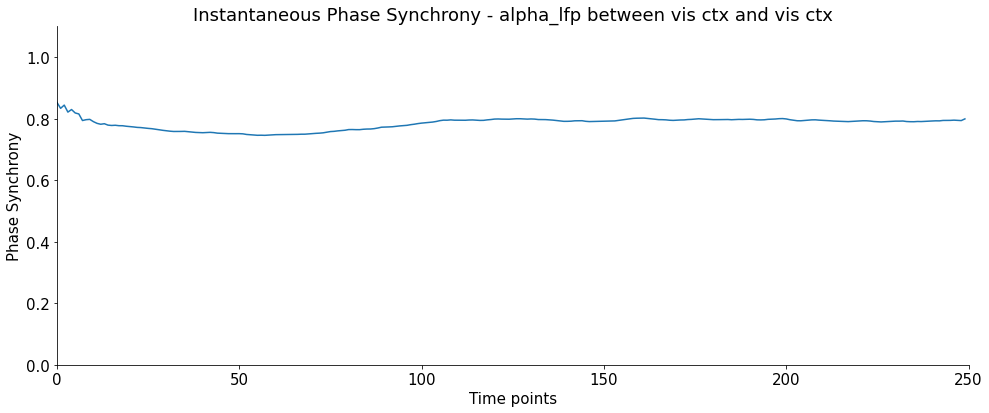

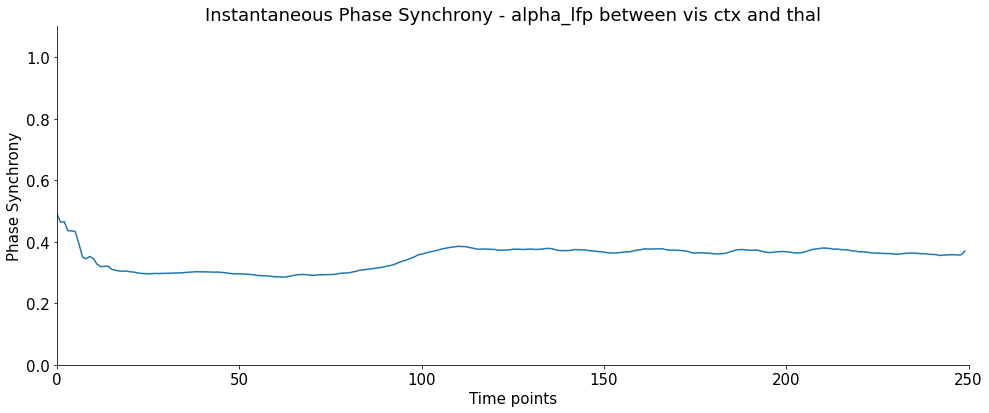

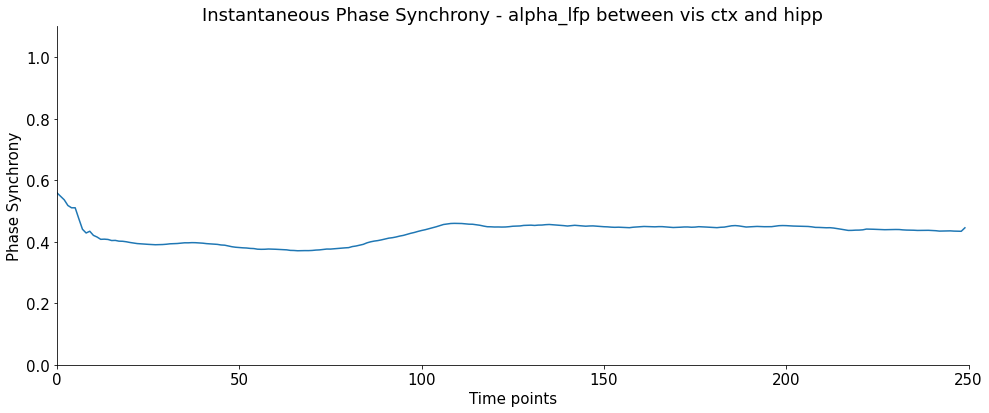

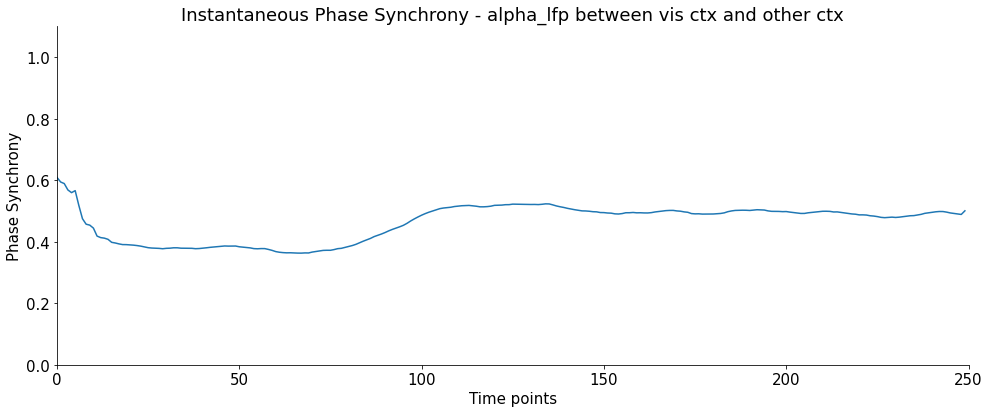

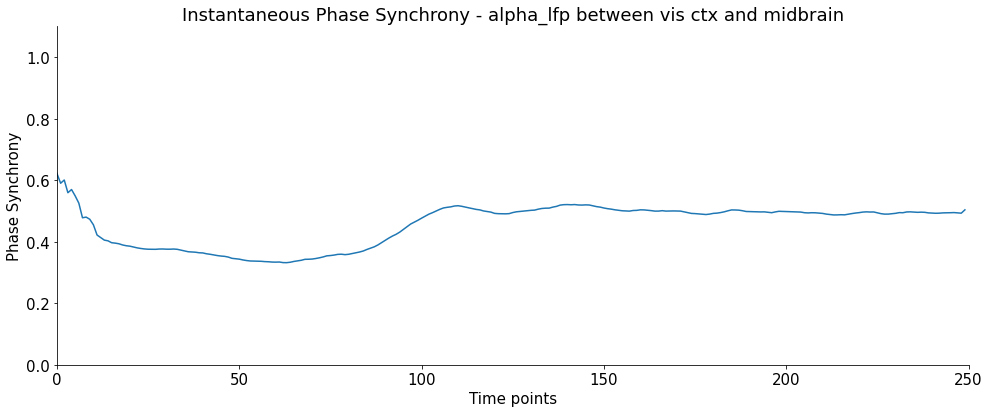

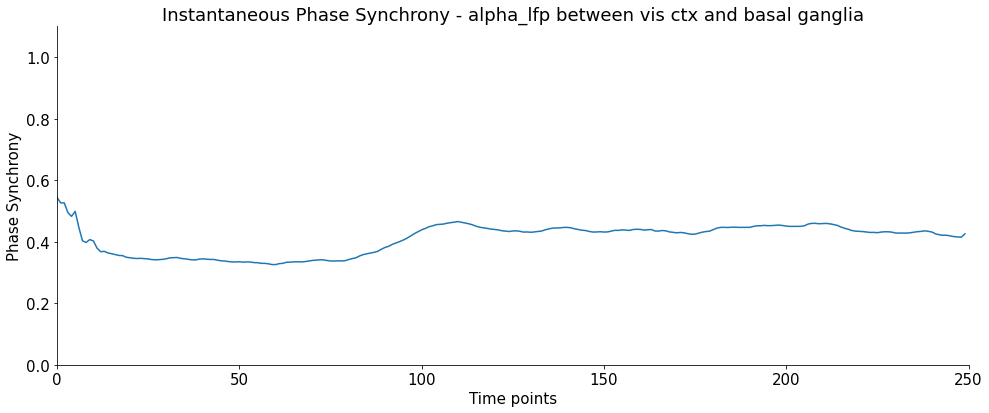

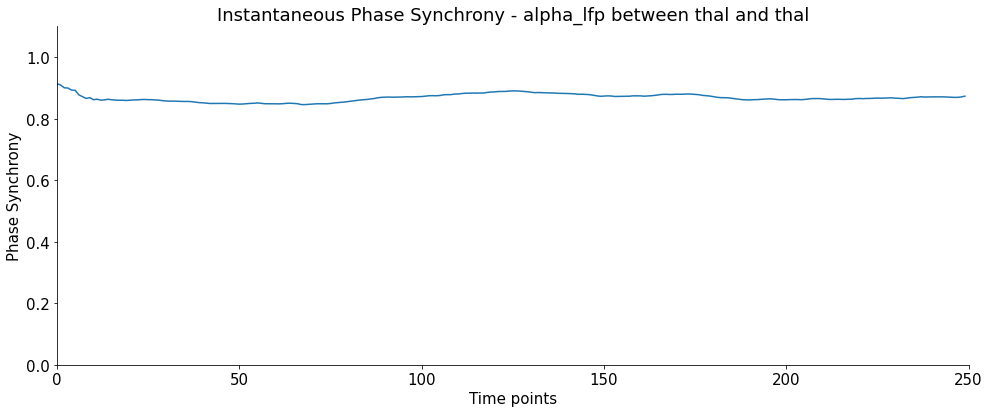

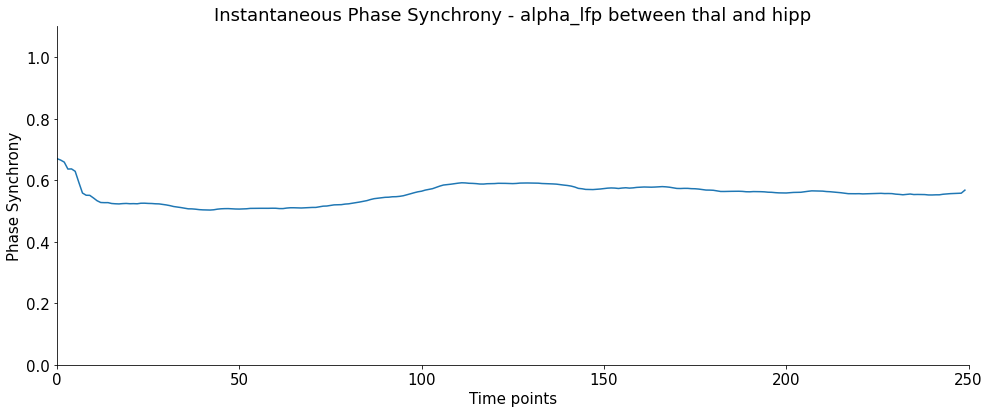

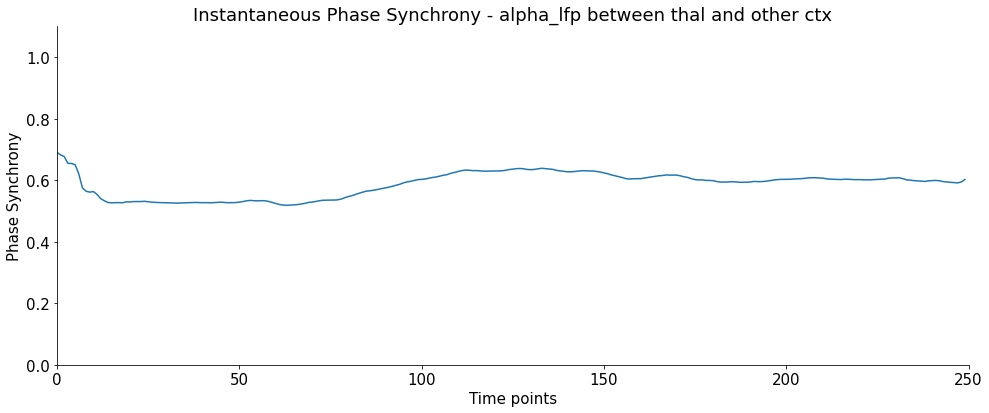

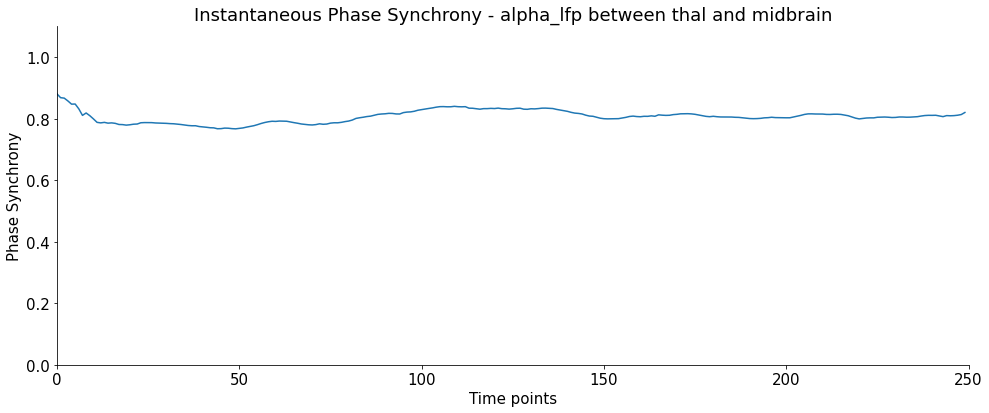

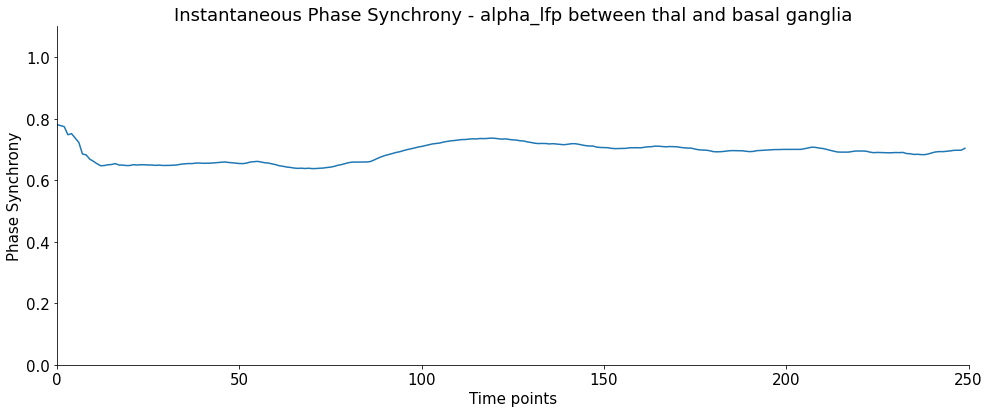

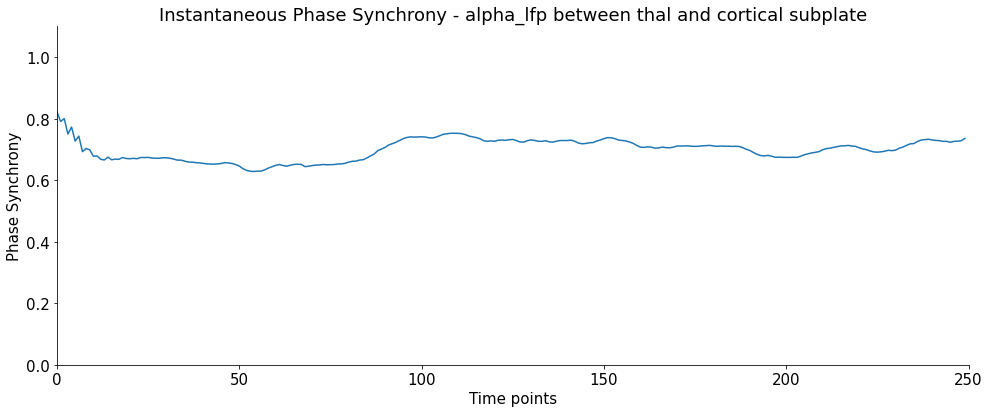

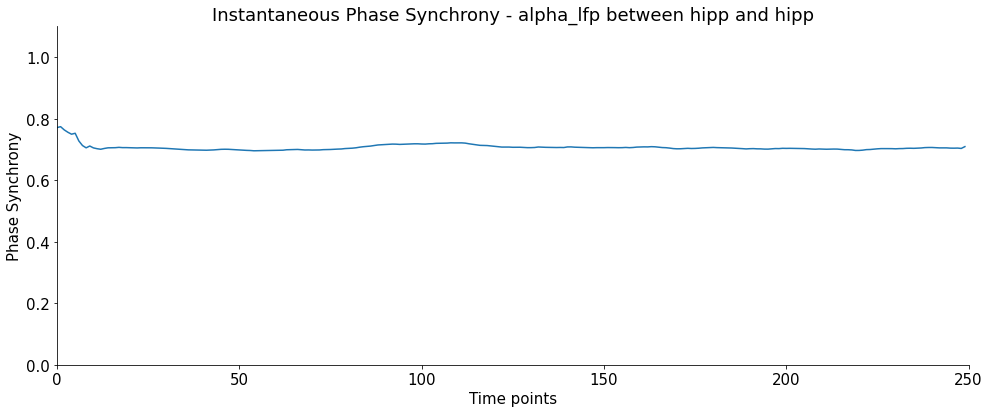

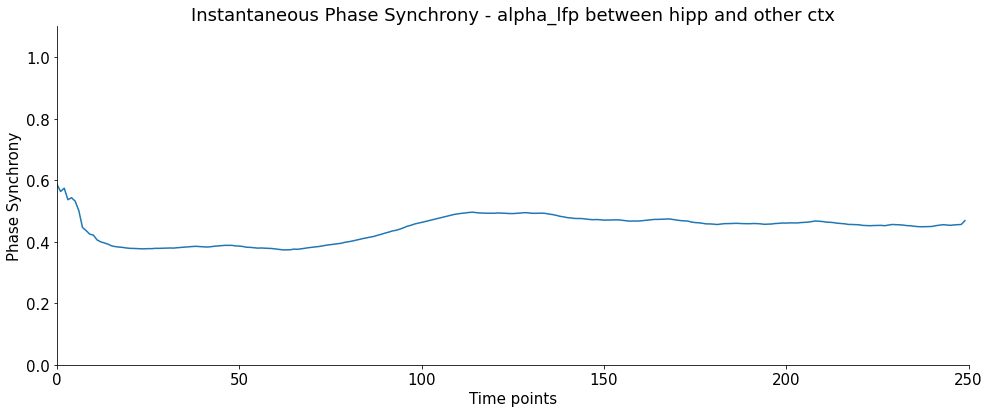

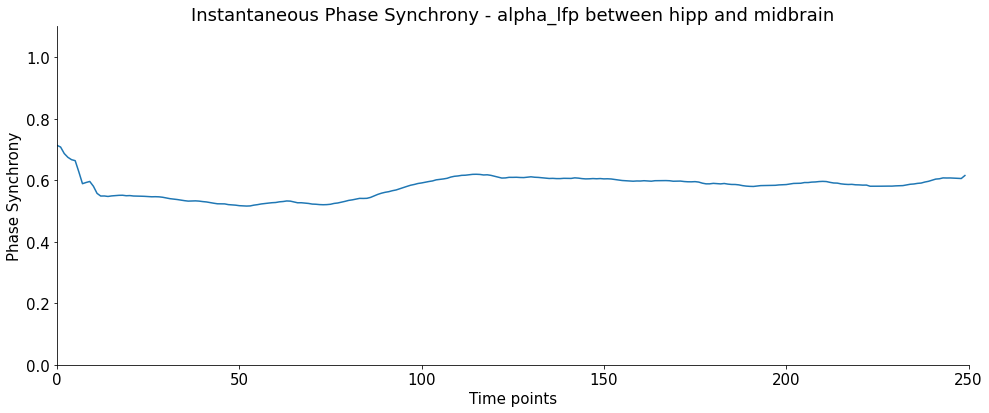

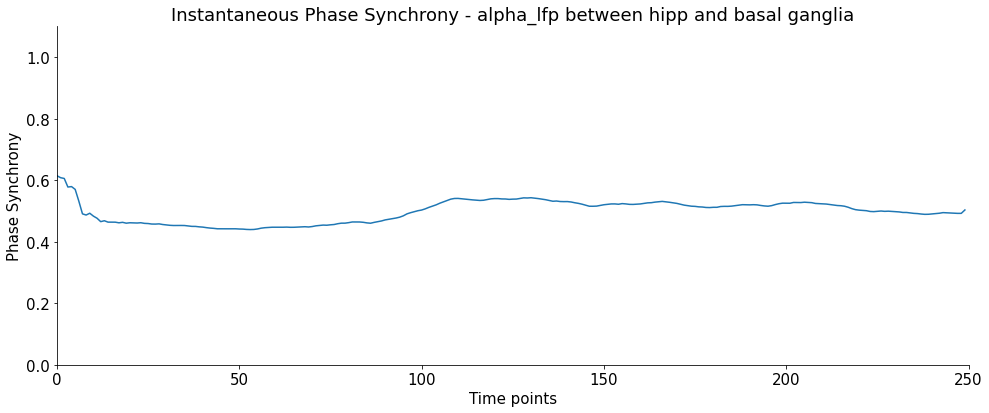

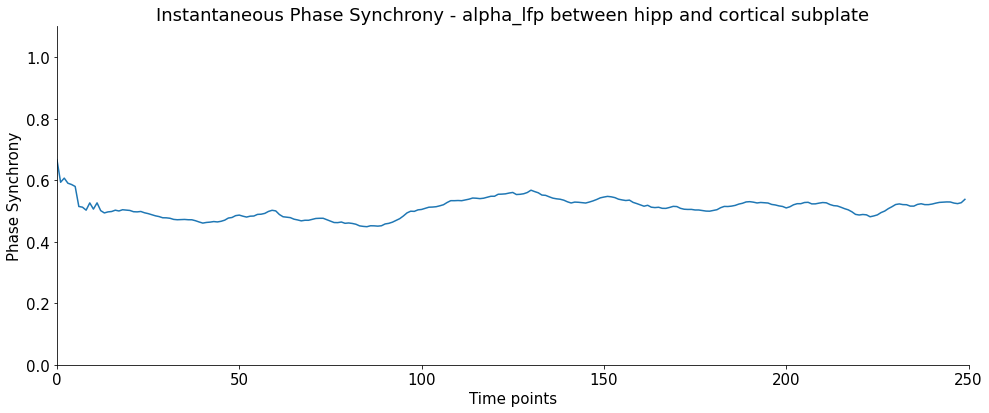

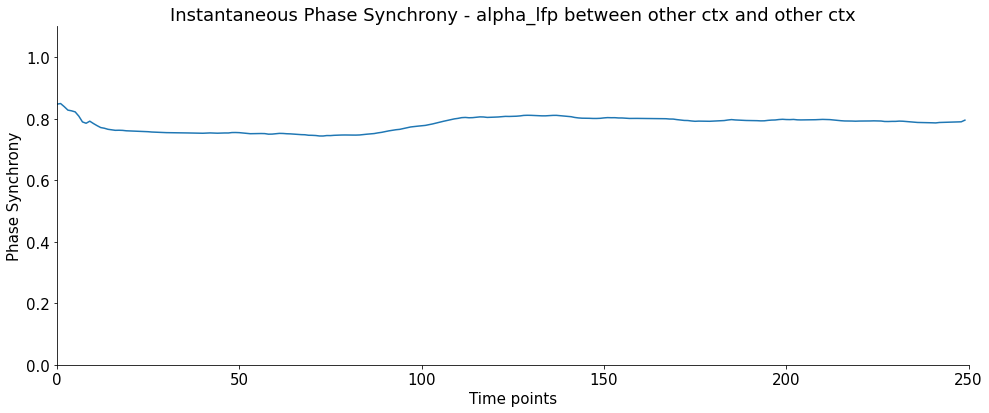

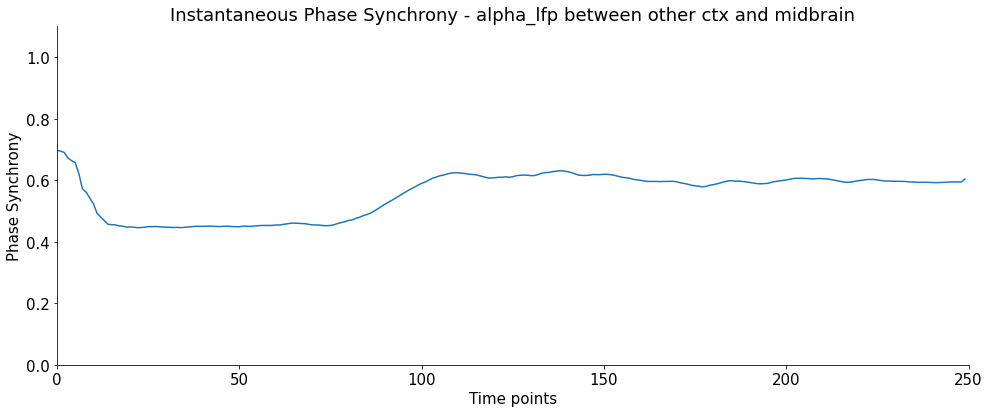

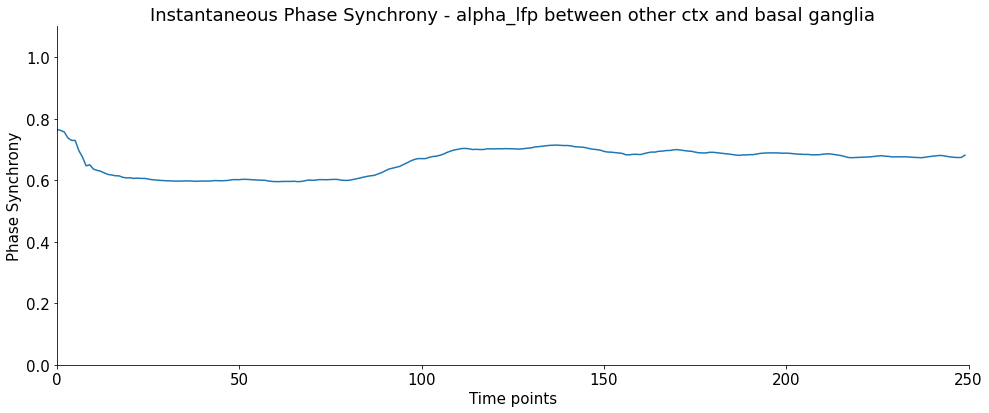

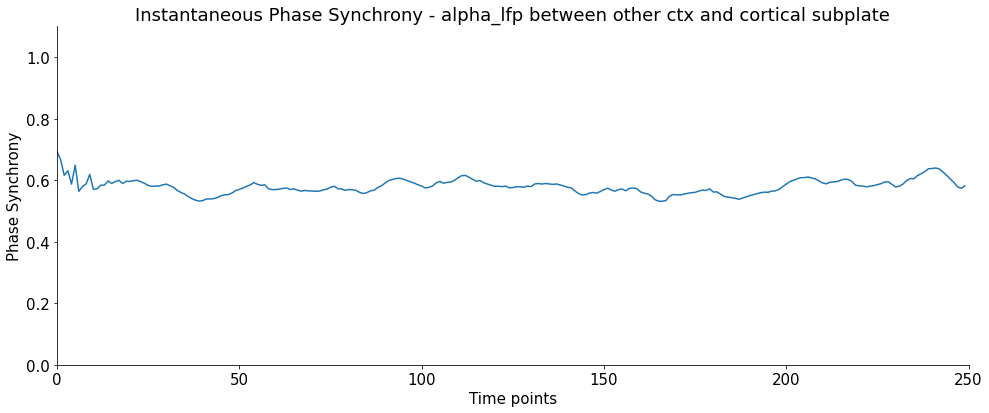

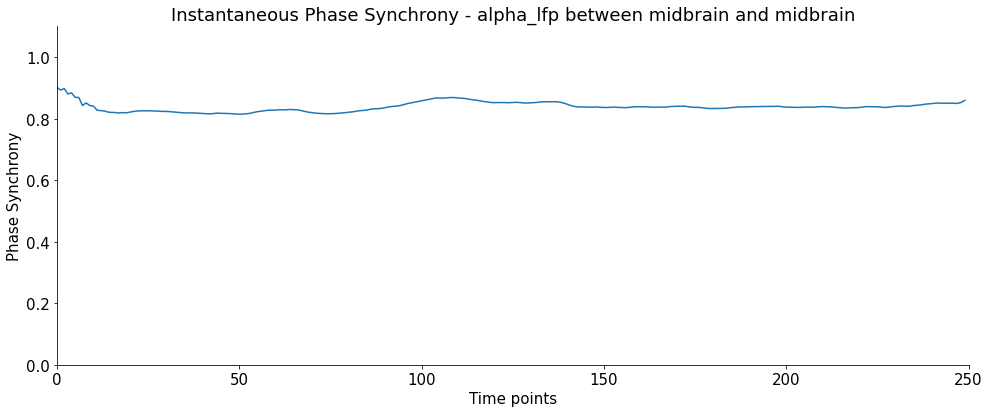

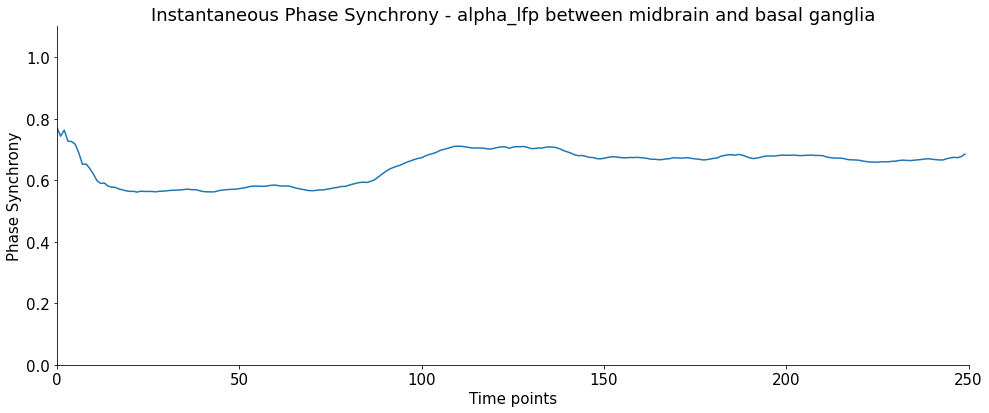

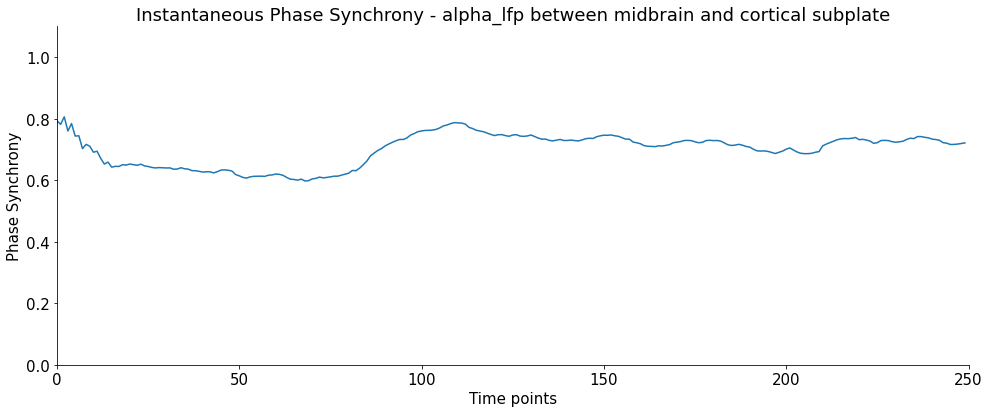

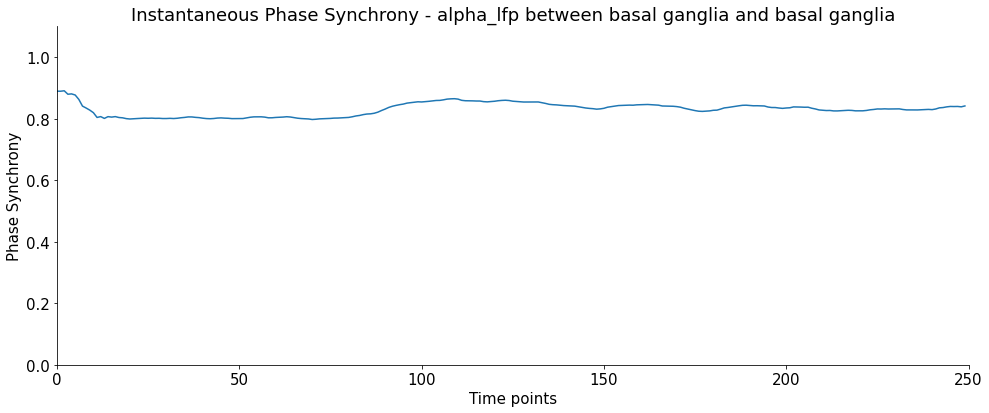

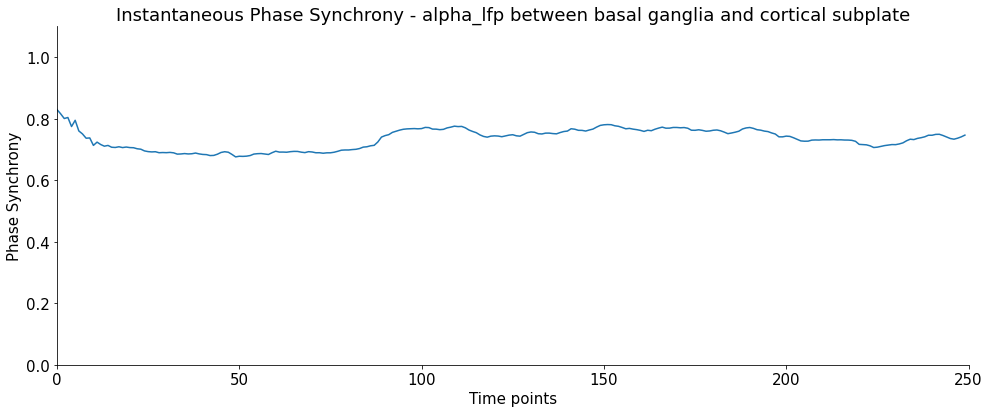

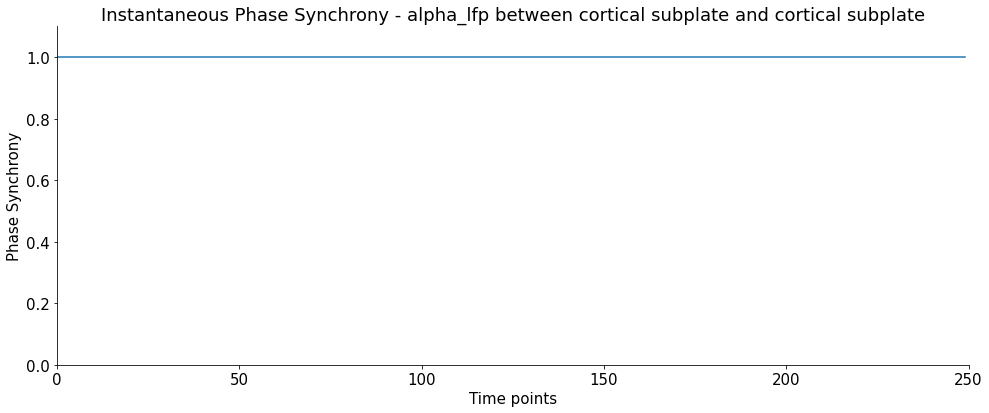

In [201]:
for i in range(len(brain_groups)):
    for j in range(i,len(brain_groups)):
        a_ps = phase_synch_batch(i_mouse = mice, dist_plot = True, group1 = i, group2=j)

In [101]:
dat_LFP_all[0]['theta_lfp'][0].shape

(214, 250)

In [100]:
area1 = 1
area2 = 11
area_name1 = dat_LFP['brain_area_lfp'][area1]
area_name2 = dat_LFP['brain_area_lfp'][area2]
plots = False

n_trials = len(dat['response'])
peaks = np.zeros(n_trials)
for i in range(n_trials):
  area_name1 = dat_LFP['brain_area_lfp'][area1]
  area_name2 = dat_LFP['brain_area_lfp'][area2]
  ps = phase_synch( sig1 = smooth_sig1, sig2 = smooth_sig2, trial_num = i, area1 = area_name1, area2 = area_name2, plot_ph = plots )  # Counting number of peaks in the sequence
  end = int(dat['gocue'][i]*100)
  peaks[i] = len(signal.find_peaks(ps[2][:end], height=0.6)[0])/end


TypeError: visualize_areas() got an unexpected keyword argument 'data_LFP'

In [ ]:
peaks_p = np.zeros(110)
for i in range(110):
  area_name1 = dat_LFP['brain_area_lfp'][area1]
  area_name2 = dat_LFP['brain_area_lfp'][area2]
  smooth_sig1, smooth_sig2 = visualize_areas(data_LFP = dat_LFP,trial_num = i,typ = "gaussian", win_len = 4, 
                  data_all = dat, fig_size = (18,10), area1 = area1, area2 = area2, passive = True) #gaussian is good
  ps = phase_synch( sig1 = smooth_sig1, sig2 = smooth_sig2, trial_num = i, area1 = area_name1, area2 = area_name2, plot_ph = plots )
  end = 250
  peaks_p[i] = len(signal.find_peaks(ps[2][:end], height=0.6)[0])/end

In [ ]:
plotter = peaks
sns.distplot(peaks_p, hist=True, kde=True,  # plot histogram with kernel density
             bins=80, color = 'gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'k'});
sns.distplot(plotter[no_stim], hist=True, kde=True,  # plot histogram with kernel density
             bins=80, color = 'gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'r'});
sns.distplot(plotter[one_side_stim], hist=True, kde=True,  # plot histogram with kernel density
             bins=80, color = 'gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'g'});
sns.distplot(plotter[two_side_stim], hist=True, kde=True,  # plot histogram with kernel density
             bins=80, color = 'gray', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4, 'color': 'b'});

In [ ]:
# Obtain powers of alpha and theta band for correct and incorrect trials for stimulus on one side
correct_trials    = np.where(correct_one_side == True)[0]
incorrect_trials  = np.where(correct_one_side == False)[0]


def get_powers(area1='VISam',area2='LGd', dat_LFP= dat_LFP,dat = dat,correct_trials = correct_trials, incorrect_trials = incorrect_trials):
  """
  This function takes the areas into account and computes the band powers by obtaining the 
  power values at every time bin (in a particular frequency band) and then takes the 
  average of those power values for each trial

  input arguments:
  area1 : Brain area 1
  area2 : Brain area 2
  dat_LFP: LFP data
  dat: dictionary containing response times, time vectors
  correct_trials: correct trials for one sided stimulus
  incorrect_trials: incorrect trials for one sided stimulus

  output arguments:
  correct_trials_alpha_power_signal1/2 : Alpha power for correct trials for signal 1/ 2
  incorrect_trials_alpha_power_signal1/2 : Alpha power for incorrect trials for signal 1/2
  correct_trials_theta_power_signal1/2: Theta power for correct trials for signal 1/2
  incorrect_trials_theta_power_signal1/2: Theta power for incorrect trials for signal 1/2 

  """
  # Initializing empty arrays to append
  correct_trials_alpha_power_signal1 = np.array([]) ; correct_trials_alpha_power_signal2 = np.array([]);
  correct_trials_theta_power_signal1 = np.array([]) ; correct_trials_theta_power_signal2 = np.array([]);
  incorrect_trials_alpha_power_signal1 = np.array([]); incorrect_trials_alpha_power_signal2 = np.array([])
  incorrect_trials_theta_power_signal1 = np.array([]); incorrect_trials_theta_power_signal2 = np.array([])

  ind1 = dat_LFP["brain_area_lfp"].index(area1)
  ind2 = dat_LFP["brain_area_lfp"].index(area2)
  regions = np.array(dat_LFP["brain_area_lfp"]) # this is for multiple occurences of one region

  # If more than one instance, taking the first recording area into account
  if dat_LFP["brain_area_lfp"].count(area1) >1:
       ind1 = np.where(regions == area1)[0][1]

  if dat_LFP["brain_area_lfp"].count(area2) >1:
      ind2 = np.where(regions == area2)[0][1]
  
  for i_trial in range(len(dat['response'])):
    # Compute Fourier transform 
    freq_vals, fft_signal1, fft_signal2 = fourier(NT = NT, dt = 10, signal1 = dat_LFP["lfp"][ind1,i_trial,:] , signal2 = dat_LFP["lfp"][ind2,i_trial,:],
                                                  dat = dat_LFP,trial_num = i_trial, area1 = area1, area2 = area2, fig_size = (18,10))
    # fft_signal1 = 10 * np.log10(fft_signal1) # In dB, can use to visualize power spectrum but powers are calculated using raw power 
    # fft_signal2 = 10 * np.log10(fft_signal2)
    alpha_indices = np.where(np.logical_and(freq_vals>=8, freq_vals<=12)) # alpha - 8-12 Hz # get indices where frequency values are in alpha and theta range
    theta_indices = np.where(np.logical_and(freq_vals>=4, freq_vals<=7)) # theta - 4-7 Hz

    if i_trial in correct_trials:
      correct_trials_alpha_power_signal1 =  np.append(correct_trials_alpha_power_signal1, np.mean(fft_signal1[alpha_indices]))
      correct_trials_alpha_power_signal2 = np.append(correct_trials_alpha_power_signal2, np.mean(fft_signal2[alpha_indices]))

      correct_trials_theta_power_signal1 = np.append(correct_trials_theta_power_signal1, np.mean(fft_signal1[theta_indices]))
      correct_trials_theta_power_signal2 = np.append(correct_trials_theta_power_signal2, np.mean(fft_signal2[theta_indices]))
   
    else:
      incorrect_trials_alpha_power_signal1 = np.append(incorrect_trials_alpha_power_signal1, np.mean(fft_signal1[alpha_indices])) 
      incorrect_trials_alpha_power_signal2 = np.append(incorrect_trials_alpha_power_signal2, np.mean(fft_signal2[alpha_indices]))

      incorrect_trials_theta_power_signal1 = np.append(incorrect_trials_theta_power_signal1, np.mean(fft_signal1[theta_indices]))
      incorrect_trials_theta_power_signal2 = np.append(incorrect_trials_theta_power_signal2, np.mean(fft_signal2[theta_indices]))
  
  return correct_trials_alpha_power_signal1, correct_trials_alpha_power_signal2,correct_trials_theta_power_signal1,correct_trials_theta_power_signal2,
  incorrect_trials_alpha_power_signal1,incorrect_trials_alpha_power_signal2, incorrect_trials_theta_power_signal1, incorrect_trials_theta_power_signal2


# Function ends


# correct_trials_alpha_power_signal1, correct_trials_alpha_power_signal2,correct_trials_theta_power_signal1,correct_trials_theta_power_signal2,incorrect_trials_alpha_power_signal1,incorrect_trials_alpha_power_signal2, incorrect_trials_theta_power_signal1, incorrect_trials_theta_power_sign = get_powers()
correct_trials_alpha_power_signal1, correct_trials_alpha_power_signal2,correct_trials_theta_power_signal1,correct_trials_theta_power_signal2,
incorrect_trials_alpha_power_signal1,incorrect_trials_alpha_power_signal2, incorrect_trials_theta_power_signal1, 
incorrect_trials_theta_power_signal2 = get_powers(area1='VISam',area2='LGd', dat_LFP= dat_LFP,dat = dat,correct_trials = correct_trials, 
                                                  incorrect_trials = incorrect_trials)


In [ ]:
nareas = 4 # only the top 4 regions are in this particular mouse
NN = len(dat['brain_area']) # number of neurons
barea = nareas * np.ones(NN, ) # last one is "other"
for j in range(nareas):
  barea[np.isin(dat['brain_area'], brain_groups[j])] = j # assign a number to each region

In [ ]:
#--------------------Section 1: dvision of trials based on contract and correct/incorrect------------------------

no_stim, one_side_stim, two_side_stim = split_stim_indices(dat)
correct, incorrect = split_accuracy_indices(dat)
#to get only one_side trials which are correct use np.logical_and(one_side_stim, correct)
correct_one_side = np.logical_and(one_side_stim, correct)

correct_two_side = np.logical_and(two_side_stim, correct)
incorrect_two_side = np.logical_and(two_side_stim, incorrect)
correct_no_stim = np.logical_and(no_stim, correct)
incorrect_no_stim = np.logical_and(no_stim, incorrect)

incorrect_one_side = np.logical_and(one_side_stim, incorrect)


#------------------------section 2: initialize basic variables---------------------
dt = 10 # binning at 10 ms
NT = dat_LFP['lfp'].shape[-1] # number of time bins
time_vec = dt * np.arange(NT)
total_trial = dat_LFP['lfp'].shape[1]

#----------------------Section 3: merging functions into one--------------------------------
dt = 10
# time_vec => time vector in ms
NT = dat_LFP['lfp'].shape[-1] # number of time bins
time_vec = dt * np.arange(NT)


def Synchrony_analyzer(plot_raw_LFP = True, trial_num=1, typ="gaussian", win_len=4, st=0.5,  fig_size=(18,10),
                        area1 = "VISam", area2="LGd", plot_fourier=True, plot_cor=True, maxlags = 100, plot_phase = True, plot_lag_dist = True ):

    # subsection 1: plot LFP signals from an arbitrary trial 
    if plot_raw_LFP:
        smooth_sig1, smooth_sig2, area1, area2 = visualize_areas(data_LFP = dat_LFP,trial_num = trial_num,typ = typ, win_len = win_len, 
                 data_all = dat, fig_size = fig_size, area1=area1, area2=area2, plot_raw=True, plot_smoth=True)
    # subsection 2: decompose the signal from one trial and plot it
    if plot_fourier:
        freq_vals,fft_signal1,fft_signal2 = fourier(NT = NT, dt = dt, signal1 = smooth_sig1, signal2 =  smooth_sig2,
            dat = dat_LFP,trial_num = trial_num, area1 = area1,
                area2 = area2, fig_size = (fig_size), plot_f= True)

    # subsection 3: calculate the cross correlation for one trial
    if plot_cor:
        lag_vec, corr_vec, offset, max_cor = cross_corr (sig1 = smooth_sig1, sig2 = smooth_sig2, maxlag = maxlags, fig_size = (12,7), 
                area1 = area1, area2 = area2, plot_cor = True)
        
    # subsection 4: plot the phase synchrony for one trial
    if plot_phase:
        ang1, ang2, phase_synchrony = phase_synch(sig1 = smooth_sig1, sig2 = smooth_sig2, trial_num = trial_num, area1 = area1, area2=area2,
                fig_size = (14,7), plot_ph= True)

    
    # subsection 5: plot the distribution of lags associated with maximum correlation across trials
    if plot_lag_dist:

        max_synch_lag_distrib (correct_trials = correct_one_side, incorrect_trials = incorrect_one_side,                            
                            typ = typ, win_len = win_len, st =st, maxlags = maxlags, dist_plot = True,
                        fig_size = (18,5), trial_type = "one sided")
        max_synch_lag_distrib (correct_trials = correct_two_side, incorrect_trials = incorrect_two_side,
                                typ = typ, win_len = win_len, st = st, maxlags = maxlags, dist_plot = True,
                                fig_size = (18,5), trial_type = "two sided")
        max_synch_lag_distrib (correct_trials = correct_no_stim, incorrect_trials= incorrect_no_stim,
                                typ = typ, win_len = win_len, st = st, maxlags = maxlags, dist_plot = True,
                                fig_size = (18,5), trial_type = "no stimuli")
        


                
Synchrony_analyzer()


